## Inspection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [2]:
# load data
matdat = sio.loadmat('/home/mcesped/scratch/code/dataset/Pennsieve-dataset-179-version-1/files/HUP_atlas_final.mat')

In [3]:
data = matdat['wake_clip']
data.shape

(12000, 3431)

In [4]:
matdat['mni_coords'].shape

(3431, 3)

In [5]:
matdat['mni_coords'][0,:]

array([-23.4339    ,  39.0879    ,  25.16513626])

In [6]:
patient_no = matdat['patient_no'].squeeze()
patient_no
# No correspondance with the big database

array([ 1,  1,  1, ..., 60, 60, 60], dtype=uint8)

In [7]:
resected_ch = matdat['resected_ch'].squeeze().astype(bool)
resected_ch.any()

True

In [8]:
soz_ch = matdat['soz_ch'].squeeze().astype(bool)
len(soz_ch)

3431

In [9]:
# From dataset description: Estimated spike rate per 24 hours (we defined irritative zone as spike_24h>24)
spike_24h = matdat['spike_24h'].squeeze()
spike_24h

array([ 19,  31,  55, ..., 293, 272, 255], dtype=uint16)

In [10]:
spike_mask = spike_24h > 24
spike_mask

array([False,  True,  True, ...,  True,  True,  True])

In [11]:
# Read metadata
# https://github.com/jbernabei/iEEG_atlas/tree/41e1ef5dc0d0ccd569aa6f2bd2c07a26f0c04b02/data
import pandas as pd
metadata = pd.read_excel('atlas_metadata_final.xlsx')
metadata.head()

Patient      RID  Engel_6_mo  Engel_12_mo  Engel_24_mo    Therapy Implant  \
0  HUP060  RID0142         3.1          3.1          3.1   Ablation    SEEG   
1  HUP064  RID0054         1.4          1.4          1.4  Resection    ECoG   
2  HUP065  RID0055         1.1          1.1          1.2  Resection    ECoG   
3  HUP068  RID0058         1.1          1.1          NaN  Resection    ECoG   
4  HUP070  RID0060         1.2          1.2          1.2  Resection    ECoG   

     Target Laterality Lesion_status  ...  Age_surgery  Gender  \
0   Frontal          R  Non-Lesional  ...           42       F   
1   Frontal          L      Lesional  ...           21       M   
2  Temporal          R      Lesional  ...           36       M   
3  Temporal          R  Non-Lesional  ...           28       F   
4        FP          L  Non-Lesional  ...           33       M   

        portal_ID clip1_awake  clip2_awake  clip1_asleep  clip2_asleep  \
0  HUP060_phaseIV      343801       349875        387001        556201   
1   HUP64_phaseII      334801       790405        398213        475201   
2   HUP65_phaseII      507079       610604        392207        654000   
3   HUP68_phaseII      513001       590371        307801        387001   
4   HUP70_phaseII      447705       449275        383691        477872   

   which_file  clip3_awake  clip4_awake  
0           1       423000       240179  
1           1       321431       440369  
2           1       496243       505225  
3           1       448787       323125  
4           1       452025       432781  

[5 rows x 21 columns]

In [12]:
len(metadata.index)

60

In [13]:
# Based on the matlab code from the repo (they only grabbed the first 60 subjects)
late_outcome = np.zeros(len(metadata.index)).astype(int)
# Grab the latest available score
for idx in metadata.index:
    engel_scores = metadata.iloc[idx,2:5]
    # Drop nan values
    engel_scores = engel_scores[~engel_scores.isnull()].to_numpy()
    late_outcome[idx] = np.floor(engel_scores[-1])
print(len(late_outcome))
late_outcome

60


array([3, 1, 1, 1, 1, 1, 4, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3,
       1, 1, 1, 1, 1, 3, 3, 1, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1,
       3, 1, 1, 2, 3, 2, 2, 1, 1, 3, 1, 3, 1, 2, 3, 3])

In [14]:
HUP_outcome_all = np.zeros(data.shape[1]) # number of channels

for idx, score in enumerate(late_outcome):
    HUP_outcome_all[patient_no==idx+1] = score
HUP_outcome_all

array([3., 3., 3., ..., 3., 3., 3.])

In [15]:
HUP_outcome_mask = HUP_outcome_all > 1 # Based on matlab code

In [16]:
len(np.unique(patient_no[~HUP_outcome_mask]))

38

In [143]:
subjs = np.unique(patient_no)
for subj in np.unique(patient_no):
    first_length = len(patient_no[patient_no==subj])
    list_remain = subjs[subjs!=subj]
    for other_subj in list_remain:
        second_length = len(patient_no[patient_no==other_subj])
        if first_length + second_length == 68:
            print(subj, other_subj)

24 32
32 24
33 44
37 39
39 37
40 52
44 33
52 40


In [19]:
combined_mask = HUP_outcome_mask | soz_ch | spike_mask | resected_ch
# Number of chann after discarding resected ones and soz ones
clean_chn = len(combined_mask) - len(combined_mask[combined_mask])
clean_chn

532

In [20]:
len(combined_mask[combined_mask])

2899

In [21]:
# MNI Data
MNI_data = sio.loadmat('/scratch/mcesped/code/HippiEEGAtlas/code/DSP/MNI/MatlabFile.mat')

In [23]:
MNI_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'AgeAtTimeOfStudy', 'ChannelName', 'ChannelPosition', 'ChannelRegion', 'ChannelType', 'Data_N2', 'Data_N3', 'Data_R', 'Data_W', 'FacesLeft', 'FacesRight', 'Gender', 'Hemisphere', 'NodesLeft', 'NodesLeftInflated', 'NodesRegionLeft', 'NodesRegionRight', 'NodesRight', 'NodesRightInflated', 'Patient', 'RegionName', 'SamplingFrequency'])

In [25]:
MNI_data['Data_W'].shape

(13600, 1772)

In [27]:
MNI_data['ChannelPosition'].shape

(1772, 3)

In [31]:
np.unique(MNI_data['ChannelRegion'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38], dtype=uint8)

In [30]:
MNI_data['RegionName'].shape

(39, 1)

In [32]:
MNI_data['ChannelType']

array([[array(['D'], dtype='<U1')],
       [array(['D'], dtype='<U1')],
       [array(['D'], dtype='<U1')],
       ...,
       [array(['G'], dtype='<U1')],
       [array(['G'], dtype='<U1')],
       [array(['G'], dtype='<U1')]], dtype=object)

In [ ]:
# TODO tomorrow: figure out electrodes in hippocampus region and find the 
# corresponding segments

In [33]:
normal = 6096640
abnormal = 6957600
abnormal - normal

860960

In [ ]:
# Based on the MNI README, I'll assume that coordinates are in the ICBM 2009a symmetric template (1x1x1 mm)

## Merge dilated segmentations

In [1]:
import nibabel as nb
import numpy as np

In [23]:
seg_R = nb.load('/home/mcesped/scratch/code/HippiEEGAtlas/code/DSP/Template/mni_icbm152_nlin_sym_09a_nifti/tpl-MNI152NLin2009aSym_hemi-R_space-T1w_desc-subfields_dseg_dilated_3mm.nii.gz')
seg_L = nb.load('/home/mcesped/scratch/code/HippiEEGAtlas/code/DSP/Template/mni_icbm152_nlin_sym_09a_nifti/tpl-MNI152NLin2009aSym_hemi-L_space-T1w_desc-subfields_dseg_dilated_3mm.nii.gz')

In [24]:
# Check if data has the same dimensions: True
data_R = seg_R.get_fdata()
print(data_R.shape)
print(np.unique(data_R))

(197, 233, 189)
[0. 1. 2. 3. 4. 5. 6. 7. 8.]


In [25]:
data_L = seg_L.get_fdata()
print(data_L.shape)
print(np.unique(data_L))

(197, 233, 189)
[0. 1. 2. 3. 4. 5. 6. 7.]


In [5]:
# Get if the affine and header are the same: True
seg_R.affine

array([[   1.,    0.,    0.,  -98.],
       [   0.,    1.,    0., -134.],
       [   0.,    0.,    1.,  -72.],
       [   0.,    0.,    0.,    1.]])

In [6]:
seg_L.affine

array([[   1.,    0.,    0.,  -98.],
       [   0.,    1.,    0., -134.],
       [   0.,    0.,    1.,  -72.],
       [   0.,    0.,    0.,    1.]])

In [13]:
print(seg_R.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 197 233 189   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'Connectome Workbench, version 1.5.0'
aux_file        : b''
qform_code      : mni
sform_code      : mni
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -98.0
qoffset_y       : -134.0
qoffset_z       : -72.0
srow_x          : [  

In [14]:
print(seg_L.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 197 233 189   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'Connectome Workbench, version 1.5.0'
aux_file        : b''
qform_code      : mni
sform_code      : mni
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -98.0
qoffset_y       : -134.0
qoffset_z       : -72.0
srow_x          : [  

In [26]:
# Merge two files
merged_data = data_L + data_R
print(merged_data.shape)
print(np.unique(merged_data))

(197, 233, 189)
[0. 1. 2. 3. 4. 5. 6. 7. 8.]


In [27]:
new_img = nb.Nifti1Image(merged_data, seg_R.affine, seg_R.header)
nb.save(new_img, "/home/mcesped/scratch/code/HippiEEGAtlas/code/DSP/Template/mni_icbm152_nlin_sym_09a_nifti/tpl-MNI152NLin2009aSym_hemi-All_space-T1w_desc-subfields_dseg_dilated_3mm.nii.gz")

## Find channels inside of the dilated hippocampus

In [172]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import nibabel as nb
import mne

In [173]:
# Load matfiles
HUP_data = sio.loadmat('/home/mcesped/scratch/code/HippiEEGAtlas/code/DSP/Bernabei/Pennsieve-dataset-179-version-1/files/HUP_atlas_final.mat')
MNI_data = sio.loadmat('/scratch/mcesped/code/HippiEEGAtlas/code/DSP/MNI/MatlabFile.mat')

In [174]:
# Get channels positions and merge into an unique array
# From MNI Readme: The channel position is the midpoint between the electrode contacts that make up each bipolar channel
chn_position_HUP = HUP_data['mni_coords']
print(chn_position_HUP.shape)
chn_position_MNI = MNI_data['ChannelPosition']
print(chn_position_MNI.shape)

(3431, 3)
(1772, 3)


In [175]:
chn_positions = np.concatenate((chn_position_HUP, chn_position_MNI), axis=0)
chn_positions.shape

(5203, 3)

In [176]:
# Load dilated file to convert the position to voxels and then labels
seg_hipp = nb.load('/home/mcesped/scratch/code/HippiEEGAtlas/code/DSP/Template/mni_icbm152_nlin_sym_09a_nifti/tpl-MNI152NLin2009aSym_hemi-All_space-T1w_desc-subfields_dseg_dilated_3mm.nii.gz')

In [177]:
data_parc = seg_hipp.get_fdata()

In [178]:
# To voxels
inv_affine = np.linalg.inv(seg_hipp.affine)
# here's where the interpolation should be performed!!
vox = np.round((mne.transforms.apply_trans(inv_affine, chn_positions))).astype(int)
id_regions = data_parc[vox[:, 0], vox[:, 1], vox[:, 2]]
id_regions.shape

(5203,)

In [179]:
mask_hipp = id_regions.astype(bool)
mask_hipp.shape

(5203,)

In [180]:
len(mask_hipp[mask_hipp])

307

In [181]:
chn_positions[mask_hipp, :][0:10,:]

array([[ 26.37445   , -12.4955    , -26.00158885],
       [ 30.68465   , -15.12135   , -26.13825903],
       [ 34.68225   , -17.3       , -24.8645895 ],
       [-30.85515   ,  -7.562155  , -20.34579749],
       [-29.37505   , -20.6642    , -11.08829705],
       [-34.73375   , -20.0042    , -11.25163125],
       [ 21.47915   , -32.8912    ,  -7.29253346],
       [ 26.25305   , -31.3456    ,  -8.58809921],
       [ 31.2571    , -29.43035   , -11.0544482 ],
       [ 37.3766    , -26.8723    , -12.31711007]])

In [182]:
id_regions[mask_hipp]

array([7., 2., 2., 2., 4., 3., 1., 7., 5., 2., 4., 4., 6., 4., 3., 2., 4.,
       1., 7., 2., 2., 2., 2., 2., 2., 7., 2., 1., 1., 2., 7., 7., 2., 4.,
       3., 7., 2., 1., 2., 2., 6., 1., 1., 2., 2., 2., 2., 6., 2., 1., 2.,
       2., 1., 1., 2., 1., 1., 1., 2., 4., 7., 2., 2., 2., 2., 1., 4., 6.,
       2., 4., 4., 5., 4., 4., 5., 4., 7., 2., 7., 3., 1., 2., 2., 2., 1.,
       2., 4., 5., 2., 4., 5., 2., 1., 5., 2., 2., 2., 2., 1., 2., 2., 2.,
       7., 2., 5., 7., 2., 2., 4., 3., 5., 3., 2., 2., 1., 1., 2., 2., 2.,
       7., 2., 2., 4., 4., 3., 2., 2., 2., 2., 7., 5., 2., 2., 2., 2., 2.,
       2., 2., 2., 1., 3., 7., 2., 6., 2., 2., 2., 2., 2., 2., 2., 7., 2.,
       3., 2., 7., 2., 2., 7., 2., 4., 2., 2., 2., 2., 7., 2., 2., 2., 4.,
       3., 1., 2., 7., 7., 2., 1., 6., 2., 4., 3., 2., 2., 2., 2., 7., 7.,
       2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 5., 7., 7., 2., 2., 1., 2.,
       2., 2., 2., 2., 2., 2., 1., 5., 2., 2., 2., 7., 2., 3., 3., 2., 2.,
       7., 2., 2., 2., 2.

In [183]:
# Count number of subjects
subjects = np.concatenate((HUP_data['patient_no'].squeeze(), MNI_data['Patient'].squeeze()), axis=0)
subjects.shape

(5203,)

In [184]:
len(np.unique(subjects[mask_hipp]))

55

In [185]:
# Count number of normal/abnormal channels
# 1. Load the data and classify HUP data into normal/abnormal.
# 2. All MNI channels are normal. Expand the mask based on this

In [186]:
patient_no = HUP_data['patient_no'].squeeze()
resected_ch = HUP_data['resected_ch'].squeeze().astype(bool)
soz_ch = HUP_data['soz_ch'].squeeze().astype(bool)
# From dataset description: Estimated spike rate per 24 hours (we defined irritative zone as spike_24h>24)
spike_24h = HUP_data['spike_24h'].squeeze()
spike_mask = spike_24h > 24

In [187]:
# Read metadata
# https://github.com/jbernabei/iEEG_atlas/tree/41e1ef5dc0d0ccd569aa6f2bd2c07a26f0c04b02/data
import pandas as pd
metadata = pd.read_excel('Bernabei/atlas_metadata_final.xlsx')
metadata.head()

Patient      RID  Engel_6_mo  Engel_12_mo  Engel_24_mo    Therapy Implant  \
0  HUP060  RID0142         3.1          3.1          3.1   Ablation    SEEG   
1  HUP064  RID0054         1.4          1.4          1.4  Resection    ECoG   
2  HUP065  RID0055         1.1          1.1          1.2  Resection    ECoG   
3  HUP068  RID0058         1.1          1.1          NaN  Resection    ECoG   
4  HUP070  RID0060         1.2          1.2          1.2  Resection    ECoG   

     Target Laterality Lesion_status  ...  Age_surgery  Gender  \
0   Frontal          R  Non-Lesional  ...           42       F   
1   Frontal          L      Lesional  ...           21       M   
2  Temporal          R      Lesional  ...           36       M   
3  Temporal          R  Non-Lesional  ...           28       F   
4        FP          L  Non-Lesional  ...           33       M   

        portal_ID clip1_awake  clip2_awake  clip1_asleep  clip2_asleep  \
0  HUP060_phaseIV      343801       349875        387001        556201   
1   HUP64_phaseII      334801       790405        398213        475201   
2   HUP65_phaseII      507079       610604        392207        654000   
3   HUP68_phaseII      513001       590371        307801        387001   
4   HUP70_phaseII      447705       449275        383691        477872   

   which_file  clip3_awake  clip4_awake  
0           1       423000       240179  
1           1       321431       440369  
2           1       496243       505225  
3           1       448787       323125  
4           1       452025       432781  

[5 rows x 21 columns]

In [188]:
# Based on the matlab code from the repo (they only grabbed the first 60 subjects)
late_outcome = np.zeros(len(metadata.index)).astype(int)
# Grab the latest available score
for idx in metadata.index:
    engel_scores = metadata.iloc[idx,2:5]
    # Drop nan values
    engel_scores = engel_scores[~engel_scores.isnull()].to_numpy()
    late_outcome[idx] = np.floor(engel_scores[-1])
late_outcome

array([3, 1, 1, 1, 1, 1, 4, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3,
       1, 1, 1, 1, 1, 3, 3, 1, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1,
       3, 1, 1, 2, 3, 2, 2, 1, 1, 3, 1, 3, 1, 2, 3, 3])

In [189]:
HUP_outcome_all = np.zeros(HUP_data['wake_clip'].shape[1]) # number of channels

for idx, score in enumerate(late_outcome):
    HUP_outcome_all[patient_no==idx+1] = score
HUP_outcome_all

array([3., 3., 3., ..., 3., 3., 3.])

In [190]:
HUP_outcome_mask = HUP_outcome_all > 1 # Based on matlab code

In [191]:
len(np.unique(patient_no[~HUP_outcome_mask]))

38

In [192]:
HUP_mask = HUP_outcome_mask | soz_ch | spike_mask | resected_ch
print(HUP_mask.shape) # Booleans mask with true in abnormal channels
HUP_mask

(3431,)


array([ True,  True,  True, ...,  True,  True,  True])

In [193]:
# Create MNI_HUP mask
MNI_HUP_mask = np.zeros(chn_positions.shape[0]).astype(bool)
print(MNI_HUP_mask.shape)
MNI_HUP_mask

(5203,)


array([False, False, False, ..., False, False, False])

In [194]:
# Introduce the HUP mask
MNI_HUP_mask[0:len(HUP_mask)]=HUP_mask
MNI_HUP_mask # Booleans mask with true in abnormal channels

array([ True,  True,  True, ..., False, False, False])

In [195]:
# Filter mask based on hippocampus mask
abnormal_mask_hipp = MNI_HUP_mask[mask_hipp]
print(f'Normal channels in the hippocampus:{len(abnormal_mask_hipp[~abnormal_mask_hipp])}')
print(f'Abnormal channels in the hippocampus:{len(abnormal_mask_hipp[abnormal_mask_hipp])}')

Normal channels in the hippocampus:42
Abnormal channels in the hippocampus:265


In [196]:
# View some of the results
# Load data
HUP_signals = HUP_data['wake_clip']
print(HUP_signals.shape)
MNI_signals = MNI_data['Data_W']
print(MNI_signals.shape)

(12000, 3431)
(13600, 1772)


In [197]:
# Cut MNI signals to concatenate with HUP
merged_signals = np.concatenate((HUP_signals, MNI_signals[0:HUP_signals.shape[0]]), axis=1)
merged_signals.shape

(12000, 5203)

In [198]:
# Get signals in the hippocampus
hipp_signals = merged_signals[:,mask_hipp]
hipp_signals.shape

(12000, 307)

In [199]:
# Get normal vs abnormal signals
hipp_normal = hipp_signals[:,~abnormal_mask_hipp]
print(hipp_normal.shape)
hipp_abnormal = hipp_signals[:,abnormal_mask_hipp]
print(hipp_abnormal.shape)

(12000, 42)
(12000, 265)


In [63]:
import scipy.signal
def welchMethod(data, srate):
    # create Hann window
    win_seconds = 2.0
    winsize = int( win_seconds*srate ) # 2-second window
    hannw = .5 - np.cos(2*np.pi*np.linspace(0,1,winsize))/2

    # number of FFT points (frequency resolution)
    spectres = 0.5; # Hz
    nfft = int(srate/spectres)
    # print('hihi')
    # Apply Welch method
    f, welchpow = scipy.signal.welch(data,fs=srate,window=hannw,
                                    nperseg=winsize,noverlap=winsize/2,nfft=nfft, scaling='density')
    print(welchpow.shape)
    # Normalizing
    if welchpow.ndim > 1:
        welchpow = np.divide(welchpow, np.sqrt(np.sum(welchpow**2, axis=1)).reshape(welchpow.shape[0],1))
    else:
        welchpow = np.divide(welchpow, np.sqrt(np.sum(welchpow**2)))
    
    # Crop the signal
    min_freq = 1/win_seconds
    max_freq = 80 
    min_id = np.argmin(np.abs(f-min_freq))
    max_id = np.argmin(np.abs(f-max_freq))
    
    if welchpow.ndim > 1:
        return f[min_id:max_id], welchpow[:,min_id:max_id]
    else:
        return f[min_id:max_id], welchpow[min_id:max_id]
    

In [66]:
import scipy.fftpack
fs=200
# Abnormal PSD
abnormal_idx = np.random.randint(0,hipp_abnormal.shape[1])
hz_a, power_a = welchMethod(hipp_abnormal[:,abnormal_idx], 200)

# Normal PSD
normal_idx = 34#np.random.randint(0,hipp_normal.shape[1])
hz_n, power_n = welchMethod(hipp_normal[:,normal_idx], 200)

# Using STFT
import scipy.signal
# Abnormal
frex_a,time_a,pwr_a = scipy.signal.spectrogram(hipp_abnormal[:,abnormal_idx].squeeze(),200)
# Normal
frex_n,time_n,pwr_n = scipy.signal.spectrogram(hipp_normal[:,normal_idx].squeeze(),200)

(201,)
(201,)


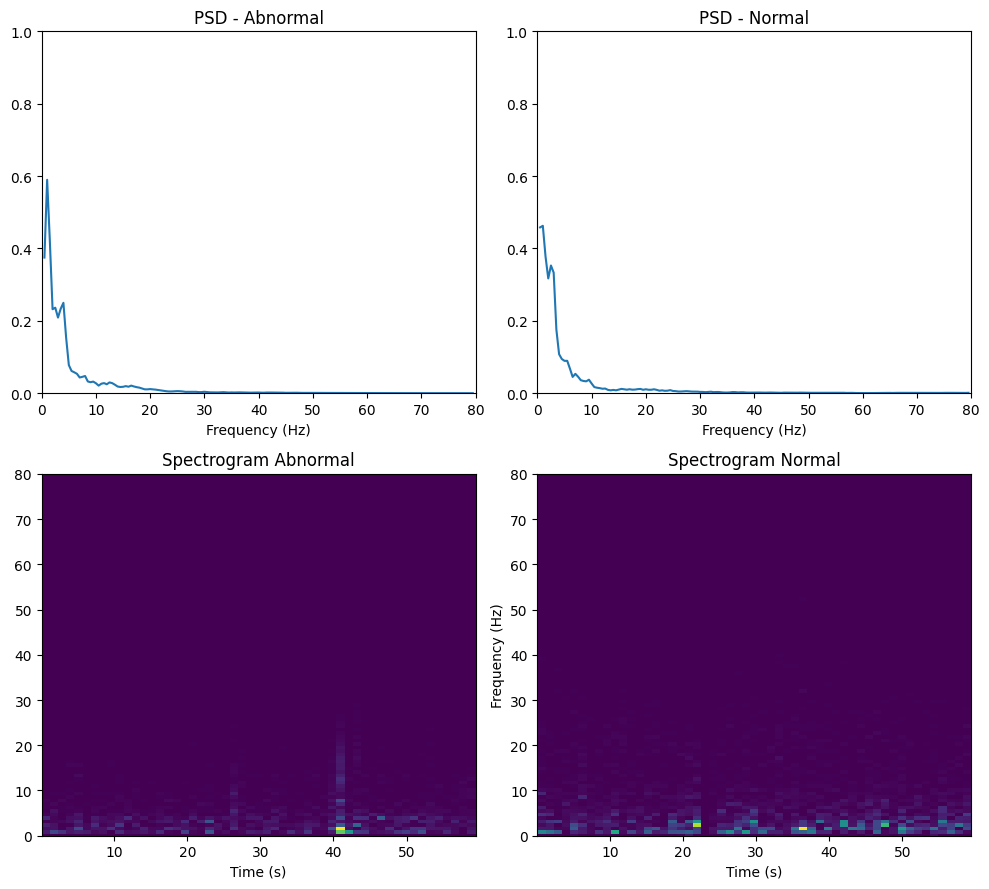

In [67]:
# now plot it
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,9))

# Using Welch's method
ax1.plot(hz_a,power_a[0:len(hz_a)])
ax1.set_xlabel('Frequency (Hz)')
ax1.set_title('PSD - Abnormal')
ax1.set_xlim([0,80])
ax1.set_ylim([0,1])

# Using Welch's method
ax2.plot(hz_n,power_n[0:len(hz_n)])
ax2.set_xlabel('Frequency (Hz)')
ax2.set_title('PSD - Normal')
ax2.set_xlim([0,80])
ax2.set_ylim([0,1])

# Using STFT
ax3.pcolormesh(time_a, frex_a, pwr_a)
ax3.set_xlabel('Time (s)'), plt.ylabel('Frequency (Hz)')
ax3.set_ylim([0,80])
ax3.set_title('Spectrogram Abnormal')

# Using STFT
ax4.pcolormesh(time_n, frex_n, pwr_n)
ax4.set_xlabel('Time (s)'), plt.ylabel('Frequency (Hz)')
ax4.set_ylim([0,80])
ax4.set_title('Spectrogram Normal')

plt.tight_layout()

In [32]:
# Mask to know if signal comes from HUP or MNI
which_dataset = np.zeros(merged_signals.shape[1])
# 1 for HUP, 0 for MNI
which_dataset[0:HUP_signals.shape[1]] = 1
which_dataset

array([1., 1., 1., ..., 0., 0., 0.])

In [33]:
which_dataset = which_dataset[mask_hipp]
which_dataset_normal = which_dataset[~abnormal_mask_hipp]
which_dataset_abnormal = which_dataset[abnormal_mask_hipp]

In [34]:
map_dataset = {
    0: 'MNI',
    1: 'HUP'
}

In [35]:
print('Normal coming from', map_dataset[which_dataset_normal[normal_idx]])
print('Abnormal coming from', map_dataset[which_dataset_abnormal[abnormal_idx]])

Normal coming from MNI
Abnormal coming from HUP


In [36]:
pwr_a.max()

390.7903056936319

In [37]:
pwr_n.max()

4689.50408488724

### Check visualization of data in low dim space

In [70]:
# Try PCA on PSD 
from sklearn.decomposition import PCA

In [69]:
# Get all PSDs
hz_all, power_all = welchMethod(hipp_signals.T, 200)

(307, 201)


In [72]:
power_all.shape

(307, 159)

The total explained variance using 159 components is 100.000 percent.


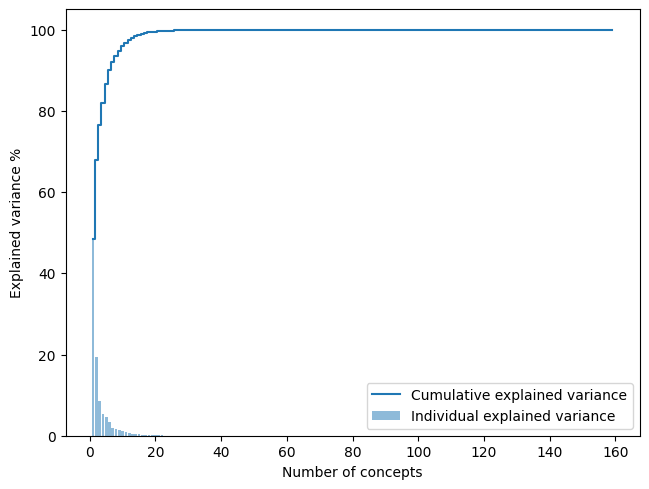

In [71]:
# Apply PCA on training data and get the explained variance [ / 4 marks]
PCA_alg = PCA() # 64 is the minimum between the training examples and the # of features
PCA_alg.fit(power_all)

# Print the variance:
total_variance = np.sum(PCA_alg.explained_variance_ratio_)*100
print('The total explained variance using %i components is %.3f percent.' % (PCA_alg.n_components_, total_variance))

# Plotting explained variance with number of concepts [ / 4 marks]
exp_var_ratio = PCA_alg.explained_variance_ratio_
#
cum_sum_var = np.cumsum(exp_var_ratio)
#
# Create the visualization plot
#
plt.bar(range(1,len(exp_var_ratio)+1), exp_var_ratio*100, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,len(cum_sum_var)+1), cum_sum_var*100, where='mid',label='Cumulative explained variance')
plt.legend(loc='best')
plt.tight_layout()

plt.xlabel('Number of concepts')
plt.ylabel('Explained variance %')
plt.show()

In [73]:
# To get the exact index where the variance is above 80%
id = np.argmax(cum_sum_var > 0.8)+1
print(f'The minimum number of components to get a variance above 80% is {id:.3f}, with a value of {cum_sum_var[id-1]*100:.3f}%')

The minimum number of components to get a variance above 80% is 4.000, with a value of 81.837%


In [76]:
labels = abnormal_mask_hipp.astype(int) # 1 abnormal, 0 normal

In [77]:
import seaborn as sns

In [79]:
# Apply PCA to the test dataset
# Get results
PCA_alg = PCA(n_components=3) 
power_PCA = PCA_alg.fit_transform(power_all)
power_PCA.shape

(307, 3)

In [81]:
# Put into df
df_dict = {
    '1 component': power_PCA[:,0],
    '2 component': power_PCA[:,1],
    '3 component': power_PCA[:,2],
    'Abnormal': labels
}
df_plot = pd.DataFrame(df_dict)
df_plot.head()

1 component  2 component  3 component  Abnormal
0     0.200372     0.046866    -0.043773         1
1     0.090798     0.036065    -0.061873         1
2    -0.117914     0.267744    -0.109709         1
3    -0.378386     0.140246     0.026808         1
4    -0.265016    -0.206584     0.029473         1

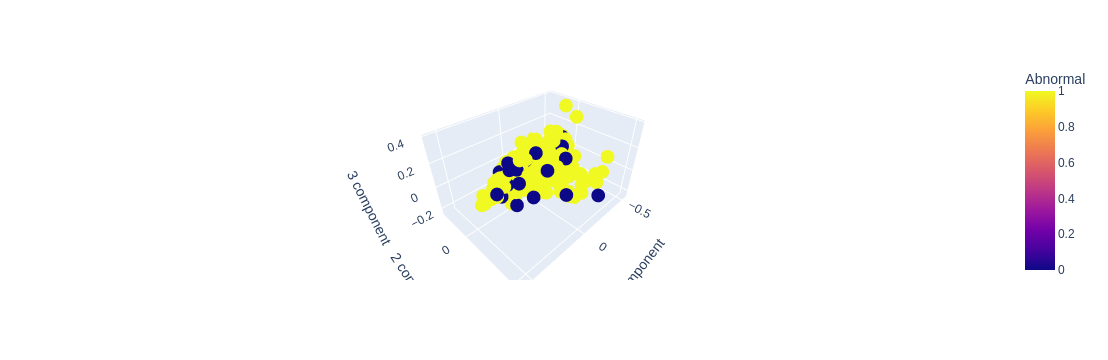

In [83]:
import plotly.express as px
fig = px.scatter_3d(df_plot, x='1 component', y='2 component', z='3 component', color='Abnormal')
fig.show()
# Cannot tell from PCA

In [84]:
# Try t-sne
from sklearn.manifold import TSNE
tSNEmapper = TSNE(n_components=3,               # How many dimensions to use. Never more than 2 or 3
                  init='random',                # First initialization. Sparse matrices need 'random'.  Otherwise use 'pca'
                  perplexity=100.0,              # Read below
                  early_exaggeration=12.0,      # Read below
                  learning_rate='auto',         # Related to above. Leave to auto
                  n_iter=5000,                  # Very important to let iterate enough
                  n_iter_without_progress=300,  # Set early stopping
                  metric='euclidean',           # Metric to use to calculate distances.
                  min_grad_norm=1e-7,           # Minimum gradient to continue iterating
                  verbose=0,                    # Verbosity
                  random_state=42,              # Random seed
                  n_jobs=4,                     # Parallel processes
                 )
TSNE_embedding = tSNEmapper.fit_transform(power_all)
TSNE_embedding.shape

(307, 3)

In [85]:
# Put into df
df_TSNE_embedding = {
    '1 component': TSNE_embedding[:,0],
    '2 component': TSNE_embedding[:,1],
    '3 component': TSNE_embedding[:,2],
    'Abnormal': labels
}
df_TSNE_embedding = pd.DataFrame(df_TSNE_embedding)
df_TSNE_embedding.head()

1 component  2 component  3 component  Abnormal
0     3.401583     0.596029    -0.373734         1
1     1.436317     0.025446    -0.541981         1
2    -1.418533    -1.596598    -0.166905         1
3    -2.404395    -1.369291     1.545705         1
4    -2.271020     2.154813     1.924632         1

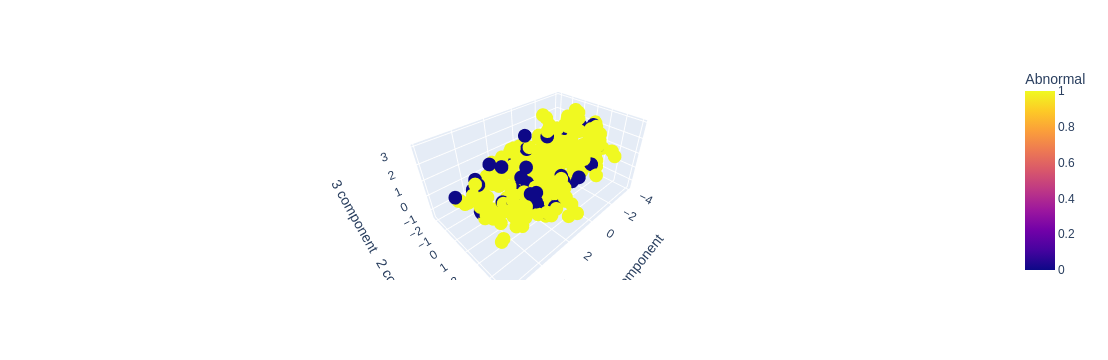

In [86]:
import plotly.express as px
fig = px.scatter_3d(df_TSNE_embedding, x='1 component', y='2 component', z='3 component', color='Abnormal')
fig.show()
# Cannot tell from PCA

In [87]:
# !pip install datashader bokeh holoviews scikit-image colorcet ipywidgets
import umap
import umap.plot # good for plotting gigantic data

In [88]:
# UMAP
# Let's create the object
reducer = umap.UMAP(n_neighbors=15,              # Number of neareast neighbours to use. 
                    n_components=3,              # Number of components. UMAP is robust to larger values
                    metric='hellinger',          # Metric to use.
                    n_epochs=None,               # Iterations. Set to convergence. None implies either 200 or 500.
                    min_dist=0.1,                # Minimum distance embedded points. Smaller makes clumps, larger, sparseness.
                    spread=1.0,                  # Scale to combine with min_dist
                    low_memory=True,             # Run slower, but with less memory.
                    n_jobs=-1,                   # Cores to use
                    random_state=42,             # Random seed
                    verbose=True                 # Verbosity
                   )

# Now we train and calculate the embedding!
UMAP_embedding = reducer.fit_transform(power_all)

UMAP(angular_rp_forest=True, metric='hellinger', n_components=3, random_state=42, verbose=True)
Mon Aug 14 10:40:37 2023 Construct fuzzy simplicial set
Mon Aug 14 10:40:38 2023 Finding Nearest Neighbors
Mon Aug 14 10:40:40 2023 Finished Nearest Neighbor Search
Mon Aug 14 10:40:43 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Mon Aug 14 10:40:45 2023 Finished embedding


In [89]:
# Put into df
df_UMAP_embedding = {
    '1 component': UMAP_embedding[:,0],
    '2 component': UMAP_embedding[:,1],
    '3 component': UMAP_embedding[:,2],
    'Abnormal': labels
}
df_UMAP_embedding = pd.DataFrame(df_UMAP_embedding)
df_UMAP_embedding.head()

1 component  2 component  3 component  Abnormal
0     1.674820     6.243640     2.909264         1
1     1.670572     5.599014     2.719500         1
2     0.430996     6.040179     5.038323         1
3     0.518126     6.364926     4.554351         1
4     4.548562     4.032605     4.488612         1

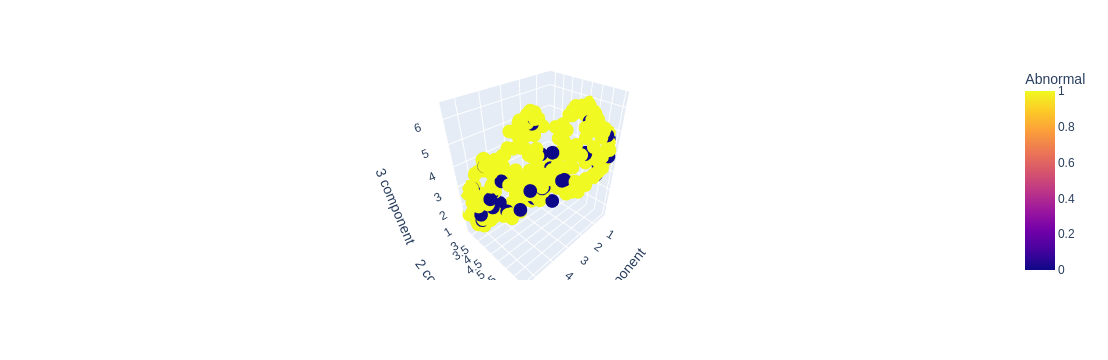

In [90]:
import plotly.express as px
fig = px.scatter_3d(df_UMAP_embedding, x='1 component', y='2 component', z='3 component', color='Abnormal')
fig.show()
# Cannot tell from PCA

### Spectrogram normalization

In [31]:
# First normalize signals
from sklearn.preprocessing import StandardScaler
print(hipp_signals.shape) # Correct shape: n_samples x n_features
scaler = StandardScaler().fit(hipp_signals)
scaled_signals = scaler.transform(hipp_signals)

(12000, 307)


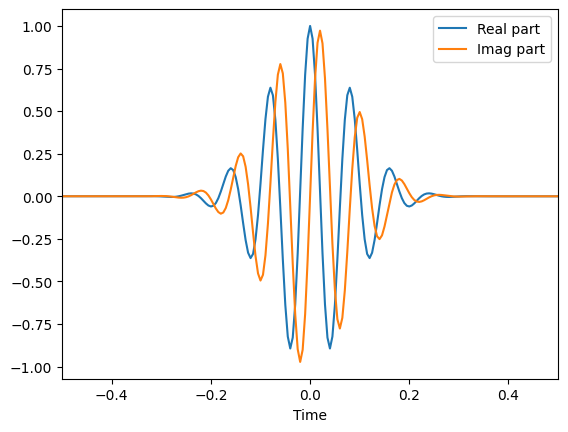

In [32]:
# Compute wavelet transform

## create complex Morlet wavelets

# wavelet parameters
srate = 200
nfrex = 50 # 50 frequencies
frex  = np.linspace(1,70,nfrex)
fwhm  = .2 # full-width at half-maximum in seconds

# time vector for wavelets
wavetime = np.arange(-2,2,1/srate)


# initialize matrices for wavelets
wavelets = np.zeros( (nfrex,len(wavetime)) ,dtype=complex)

# create complex Morlet wavelet family
for wi in range(0,nfrex):
    # Gaussian
    gaussian = np.exp( -(4*np.log(2)*wavetime**2) / fwhm**2 )
    
    # complex Morlet wavelet
    wavelets[wi,:] = np.exp(1j*2*np.pi*frex[wi]*wavetime) * gaussian
    

# show the wavelets
plt.plot(wavetime,np.real(wavelets[8,:]),label='Real part')
plt.plot(wavetime,np.imag(wavelets[8,:]),label='Imag part')
plt.xlabel('Time')
plt.xlim([-.5, .5])
plt.legend()
plt.show()

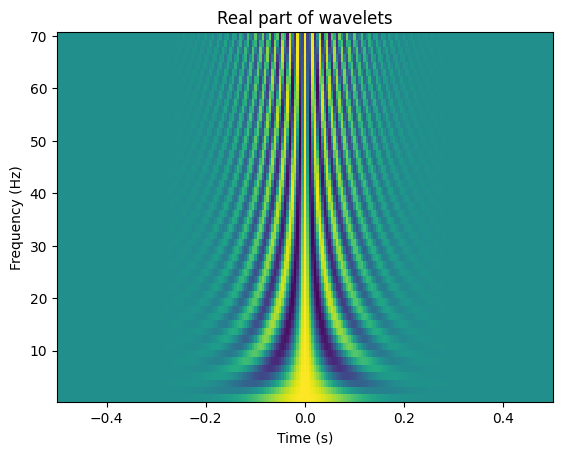

In [33]:
#This is a time power spectrum for each freq division, not a freq power spectrum for each time division.
plt.pcolormesh(wavetime,frex,np.real(wavelets))
plt.xlabel('Time (s)'), plt.ylabel('Frequency (Hz)')
plt.title('Real part of wavelets')
plt.xlim([-.5,.5])
plt.show()

In [34]:
# signal: hipp_signals [time x # channels]
timevec = np.arange(0, scaled_signals.shape[0])/200
timevec

array([0.0000e+00, 5.0000e-03, 1.0000e-02, ..., 5.9985e+01, 5.9990e+01,
       5.9995e+01])

In [37]:
## run convolution using spectral multiplication
import scipy.fftpack
# convolution parameters
nconv = len(timevec) + len(wavetime) - 1 # M+N-1
halfk = int( np.floor(len(wavetime)/2) )

# Fourier spectrum of the signal
dataX = scipy.fftpack.fft(scaled_signals.T,nconv)

# initialize time-frequency matrix
tf = np.zeros( (scaled_signals.shape[-1], nfrex,len(timevec)) )


# convolution per frequency
for fi in range(0,nfrex):
    
    # FFT of the wavelet
    waveX = scipy.fftpack.fft(wavelets[fi,:],nconv)
    # amplitude-normalize the wavelet
    waveX = waveX / np.abs(np.max(waveX))
    
    # convolution
    convres = scipy.fftpack.ifft( waveX*dataX )
    # trim the "wings"
    convres = convres[:, halfk-1:-halfk]
    
    # extract power from complex signal
    tf[:,fi,:] = np.abs(convres)**2

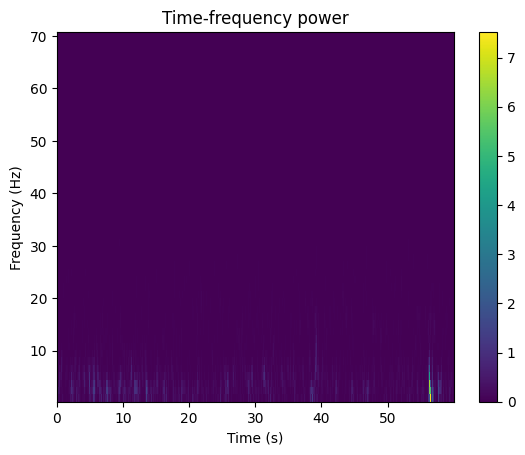

In [38]:
## plot the results

plt.pcolormesh(timevec,frex,tf[10,:,:])
plt.xlabel('Time (s)'), plt.ylabel('Frequency (Hz)')
plt.title('Time-frequency power')
plt.colorbar()
plt.show()

In [39]:
tf.shape # training examples x freq_bins x time

(307, 50, 12000)

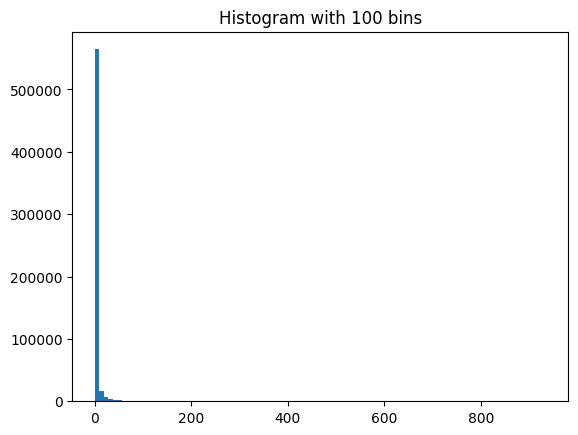

In [133]:
# Issue with the power distribution: log scale is necessary
_ = plt.hist(tf[10,:,:].flatten(), bins=100)  # arguments are passed to np.histogram
plt.title("Histogram with 100 bins")
plt.show()

In [43]:
# Apply log scalar
tf_log = np.log(tf+1e-10)

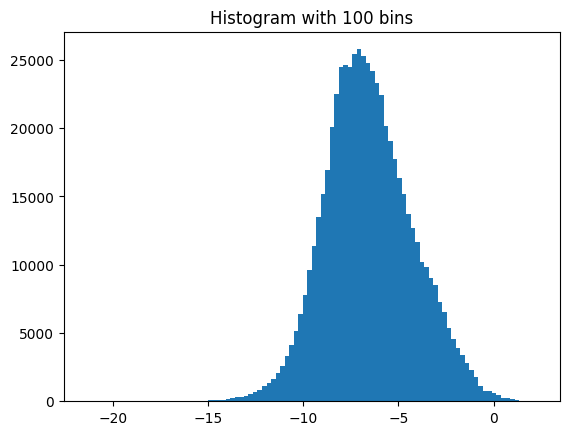

In [48]:
_ = plt.hist(tf_log[100,:,:].flatten(), bins=100)  # arguments are passed to np.histogram
plt.title("Histogram with 100 bins")
plt.show()

In [50]:
# Separate normal vs abnormal
abnormal_ft = tf_log[abnormal_mask_hipp,:,:]
normal_ft = tf_log[~abnormal_mask_hipp,:,:]

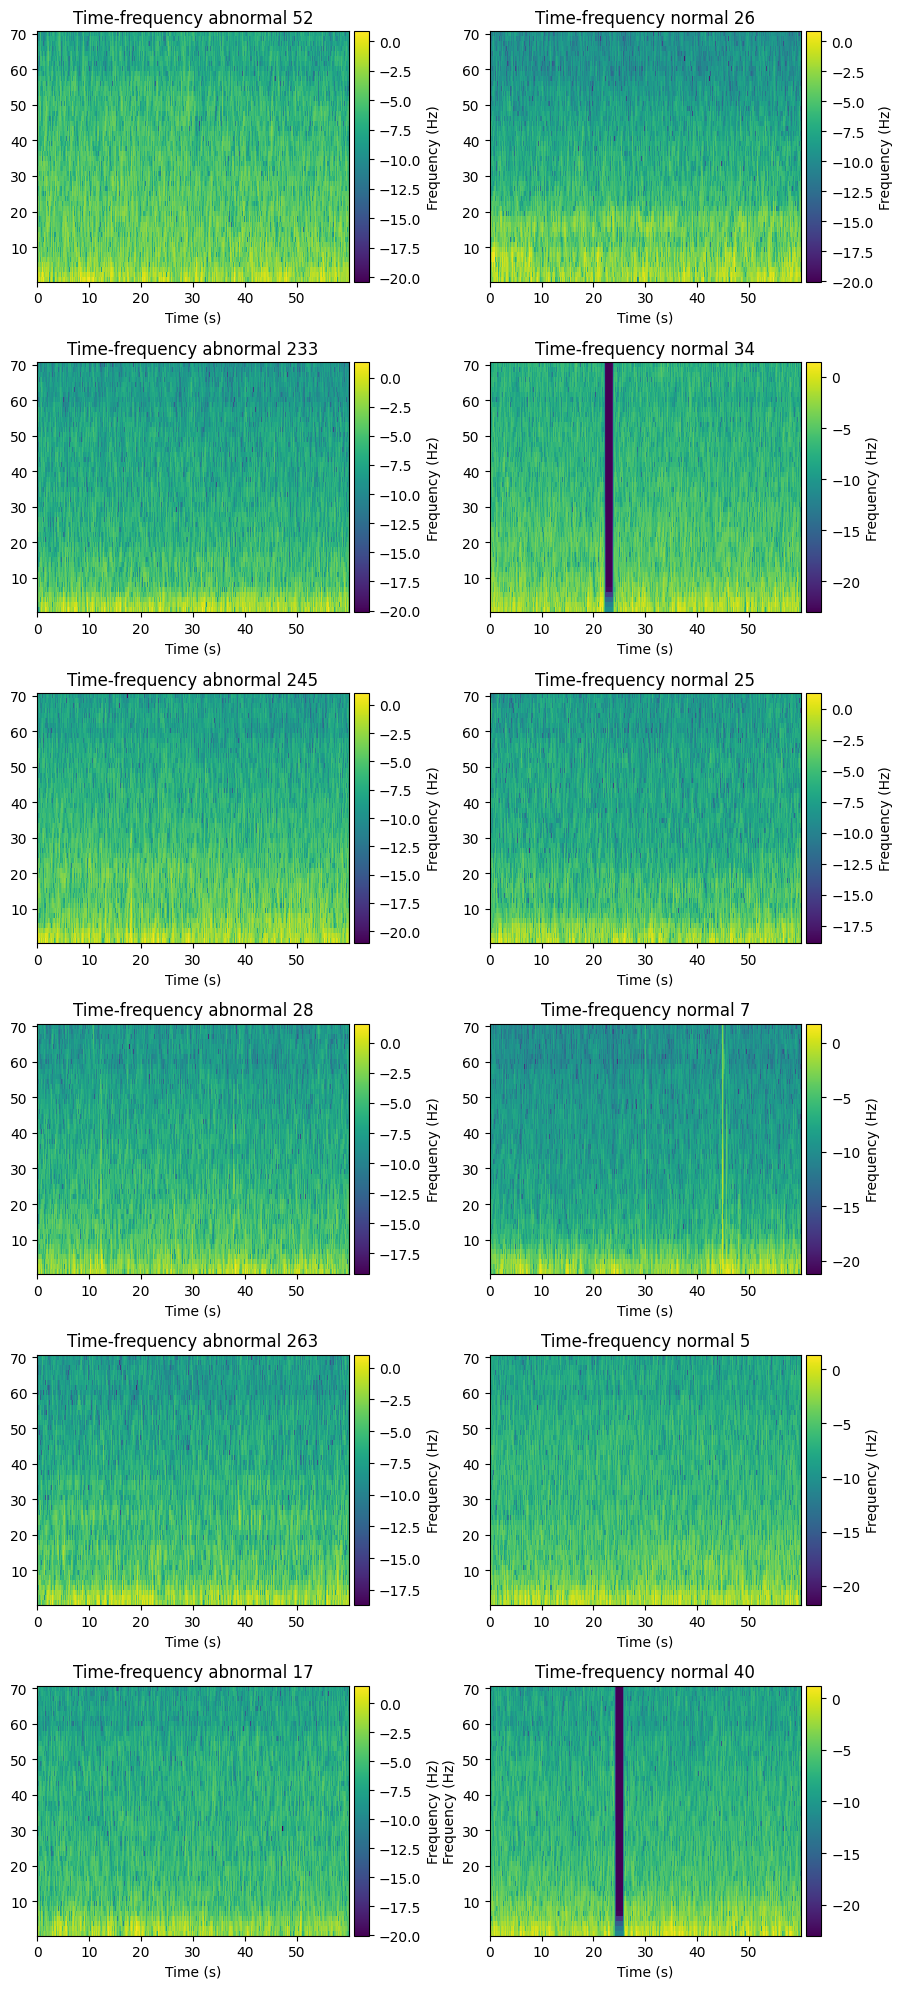

In [60]:
# plot a few examples
# now plot it
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, axes = plt.subplots(6, 2, figsize=(9,20))

for i in range(6):
    abnormal_idx = np.random.randint(0,abnormal_ft.shape[0])
    im = axes[i][0].pcolormesh(timevec,frex,abnormal_ft[abnormal_idx,:,:])
    axes[i][0].set_xlabel('Time (s)'), plt.ylabel('Frequency (Hz)')
    axes[i][0].set_title(f'Time-frequency abnormal {abnormal_idx}')
    divider = make_axes_locatable(axes[i][0])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    normal_idx = np.random.randint(0,normal_ft.shape[0])
    im = axes[i][1].pcolormesh(timevec,frex,normal_ft[normal_idx,:,:])
    axes[i][1].set_xlabel('Time (s)'), plt.ylabel('Frequency (Hz)')
    axes[i][1].set_title(f'Time-frequency normal {normal_idx}')
    divider = make_axes_locatable(axes[i][1])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

plt.tight_layout()

# Seizures

In [206]:
np.unique(patient_no)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60], dtype=uint8)

In [201]:
patients_hipp = patient_no[mask_hipp[0:len(patient_no)]]

In [202]:
len(abnormal_mask_hipp[~abnormal_mask_hipp])

42

In [204]:
# HUP patients with normal electrodes in the hippocampus
patients_hipp[~abnormal_mask_hipp[0:len(patients_hipp)]]
# I'll use subject 13, which corresponds to HUP088	RID0021. This corresponds to the 

array([13, 19, 19, 27, 30, 34, 34, 35, 46, 55, 55], dtype=uint8)

In [209]:
# According coordinates chn_position_HUP
chn_MNI_HUP_hipp = chn_position_HUP[mask_hipp[0:len(chn_position_HUP)]]

In [210]:
chn_MNI_HUP_hipp[~abnormal_mask_hipp[0:len(chn_MNI_HUP_hipp)]] # Bipolar between EEG LHD 01-Ref and EEG LHD 02-Ref


array([[-29.5756    , -17.0031    , -12.25563813],
       [-16.46195   ,  -6.5416    , -23.48822146],
       [-24.23975   , -17.30265   , -24.47281175],
       [ 25.7351    , -16.4121    , -22.01911263],
       [ 35.49995   , -23.335     , -20.22048601],
       [ 20.60725   , -11.2762    , -18.99218692],
       [ 24.57355   , -13.5342    , -19.15829427],
       [-35.47825   , -19.0184    , -17.55348785],
       [ 19.1691    , -13.5354    , -23.16044576],
       [-32.3669    , -16.25425   , -14.05499565],
       [-36.04305   , -19.3187    , -14.06448021]])

In [237]:
import pyedflib
edf_path = '/home/mcesped/projects/ctb-akhanf/mcesped/Bernabei/sub-HUP088/ses-presurgery/ieeg/sub-HUP088_ses-presurgery_task-ictal_acq-ecog_run-01_ieeg.edf'
edf = pyedflib.EdfReader(edf_path)

In [231]:
edf.getSampleFrequencies()

array([512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512,
       512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512,
       512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512,
       512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512,
       512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512])

In [225]:
annots = pd.read_csv('/home/mcesped/projects/ctb-akhanf/mcesped/Bernabei/sub-HUP088/ses-presurgery/ieeg/sub-HUP088_ses-presurgery_task-ictal_acq-ecog_run-01_events.tsv', sep='\t')
annots.head()

onset  duration trial_type  value  sample
0  120.000000       0.0   sz onset      2   61440
1  337.998047       0.0  sz offset      1  173055

In [228]:
idx_channel_1 = edf.getSignalLabels().index('EEG LHD 01-Ref')
idx_channel_2 = edf.getSignalLabels().index('EEG LHD 02-Ref')

In [241]:
signal_1 = edf.readSignal(idx_channel_1, 61440, 173055-61440)
signal_2 = edf.readSignal(idx_channel_2, 61440, 173055-61440)

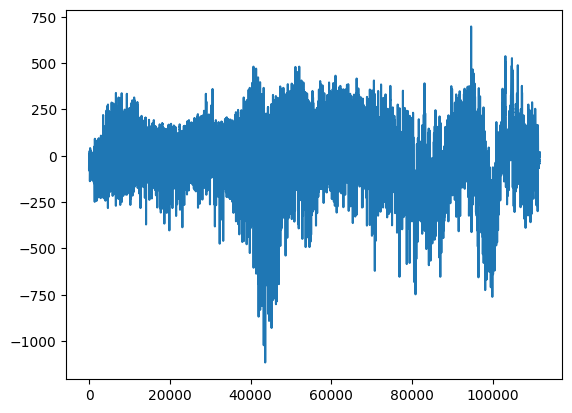

In [243]:
plt.plot(signal_2-signal_1)

(513,)


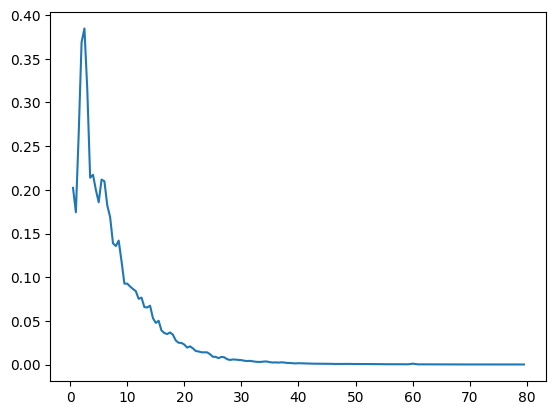

In [245]:
hz, power = welchMethod(signal_2-signal_1, 512)
hz = hz[hz<=80]
plt.plot(hz,power[0:len(hz)])

In [236]:
edf.close()

# Feature inspection

## Get features

In [54]:
def plotPaperFigures(freq, welchpow, out_path=None, show_fig='Close', ax=None):
    # welchpow: n_chans x n_samples
    # Get median:
    median_welchpow = np.median(welchpow, axis=0)
    # Get std
    n_samples = welchpow.shape[1]
    std = np.zeros(n_samples)
    mean = np.zeros(n_samples)
    for i in range(n_samples):
        (mean[i], std[i]) = scipy.stats.norm.fit(welchpow[:,i].squeeze())
    # Get quartiles
    mask = np.quantile(welchpow, [0.25, 0.75], axis=0)
        
    # Get max and min
    max_pow = np.max(welchpow, axis=0)
    min_pow = np.min(welchpow, axis=0)

    # Plot
    x_val = [0.5, 4, 8, 13, 30, 80]
    default_x_ticks = range(len(x_val))
    if ax == None:
        fig, ax = plt.subplots()
    ax.semilogx(freq, median_welchpow, 'r')
    ax.fill_between(freq,
                    mask[0,:],
                    mask[1, :],
                    alpha=0.2, color='tab:pink')
    ax.semilogx(freq, max_pow, '--', color='tab:orange')
    ax.semilogx(freq, min_pow, '--', color='tab:orange')
    ax.semilogx([4, 4], [0, 1.1], '--k')
    ax.semilogx([8, 8], [0, 1.1], '--k')
    ax.semilogx([13, 13], [0, 1.1], '--k')
    ax.semilogx([30, 30], [0, 1.1], '--k')
    ax.set_xticks(x_val)
    ax.set_xticklabels(x_val)
    ax.set_xlim([0.5,80])
    ax.set_ylim([0, 1])
    ax.set_xlabel('frequency [Hz]')
    ax.set_ylabel('Power')
    # ax.set_xscale('log')
    if out_path:
        fig.savefig(out_path)
    if show_fig=='Close':
        plt.close()
    elif show_fig == True:
        plt.show()
    return median_welchpow, mean, std

In [47]:
def plotAlternativeFigures(freq, welchpow, out_path=None, show_fig='Close', ax=None):
    # welchpow: n_chans x n_samples
    # Get std
    n_samples = welchpow.shape[1]
    std = np.zeros(n_samples)
    mean = np.zeros(n_samples)
    for i in range(n_samples):
        (mean[i], std[i]) = scipy.stats.norm.fit(welchpow[:,i].squeeze())
    # Get 2 std away
    mask_up = mean+2*std
    mask_down = mean-2*std
        
    # Get max and min
    max_pow = np.max(welchpow, axis=0)
    min_pow = np.min(welchpow, axis=0)

    # Plot
    x_val = [0.5, 4, 8, 13, 30, 80]
    default_x_ticks = range(len(x_val))
    if ax == None:
        fig, ax = plt.subplots()
    ax.semilogx(freq, mean, 'r')
    ax.fill_between(freq,
                    mask_up,
                    mask_down,
                    alpha=0.2, color='tab:pink')
    ax.semilogx(freq, max_pow, '--', color='tab:orange')
    ax.semilogx(freq, min_pow, '--', color='tab:orange')
    ax.semilogx([4, 4], [0, 1.1], '--k')
    ax.semilogx([8, 8], [0, 1.1], '--k')
    ax.semilogx([13, 13], [0, 1.1], '--k')
    ax.semilogx([30, 30], [0, 1.1], '--k')
    ax.set_xticks(x_val)
    ax.set_xticklabels(x_val)
    ax.set_xlim([0.5,80])
    ax.set_ylim([0, 1])
    ax.set_xlabel('frequency [Hz]')
    ax.set_ylabel('Power')
    # ax.set_xscale('log')
    if out_path:
        fig.savefig(out_path)
    if show_fig=='Close':
        plt.close()
    elif show_fig == True:
        plt.show()
    return mean, std

In [48]:
def plotAllChannels(freq, welchpow, out_path=None, output=False, show_fig = False, ax=None):
    x_val = [0.5, 4, 8, 13, 30, 80]
    default_x_ticks = range(len(x_val))
    if ax == None:
        fig, ax = plt.subplots()
    ax.semilogx(freq,welchpow)
    ax.semilogx([4, 4], [0, 1.1], '--k')
    ax.semilogx([8, 8], [0, 1.1], '--k')
    ax.semilogx([13, 13], [0, 1.1], '--k')
    ax.semilogx([30, 30], [0, 1.1], '--k')
    # ax.text(5.5, 0.9, r'$\theta $')
    # ax.text(9.5, 0.9, r'$\alpha $')
    # ax.text(18, 0.9, r'$\beta $')
    # ax.text(45, 0.9, r'$\gamma $')
    ax.set_xticks(x_val)
    ax.set_xticklabels(x_val)
    ax.set_xlim([0.5,80])
    ax.set_ylim([0, 1])
    ax.set_xlabel('frequency [Hz]')
    ax.set_ylabel('Power')
    if output:
        fig.savefig(out_path)
    if show_fig:
        plt.show()
    elif show_fig == 'Close':
        plt.close()

In [30]:
import scipy.signal
def welchMethod(data, srate):
    # create Hann window
    win_seconds = 2.0
    winsize = int( win_seconds*srate ) # 2-second window
    hannw = .5 - np.cos(2*np.pi*np.linspace(0,1,winsize))/2

    # number of FFT points (frequency resolution)
    spectres = 0.5; # Hz
    nfft = int(srate/spectres)
    # print('hihi')
    # Apply Welch method
    f, welchpow = scipy.signal.welch(data,fs=srate,window=hannw,
                                    nperseg=winsize,noverlap=winsize/2,nfft=nfft, scaling='density')
    print(welchpow.shape)
    # Normalizing
    if welchpow.ndim > 1:
        welchpow = np.divide(welchpow, np.sqrt(np.sum(welchpow**2, axis=1)).reshape(welchpow.shape[0],1))
    else:
        welchpow = np.divide(welchpow, np.sqrt(np.sum(welchpow**2)))
    
    # Crop the signal
    min_freq = 1/win_seconds
    max_freq = 80 
    min_id = np.argmin(np.abs(f-min_freq))
    max_id = np.argmin(np.abs(f-max_freq))
    
    if welchpow.ndim > 1:
        return f[min_id:max_id], welchpow[:,min_id:max_id]
    else:
        return f[min_id:max_id], welchpow[min_id:max_id]

In [31]:
# This is highly skewed data so I will drop a few examples. I'll rebuild the data
# I'll used 3 classes: abnormal vs normal vs resected or bad outcome. Will drop the last class
# Will rebuild the masks
HUP_mask_abnormal = soz_ch | spike_mask
HUP_drop = (resected_ch | HUP_outcome_mask) * ~HUP_mask_abnormal
HUP_normal_mask = ~(HUP_mask_abnormal | HUP_drop)

In [32]:
# Create MNI_HUP mask
mask_abnormal = np.zeros(chn_positions.shape[0]).astype(bool)
mask_drop = np.zeros(chn_positions.shape[0]).astype(bool)
mask_normal = np.ones(chn_positions.shape[0]).astype(bool)
# Introduce the HUP mask
mask_abnormal[0:len(HUP_mask_abnormal)] = HUP_mask_abnormal
mask_drop[0:len(HUP_drop)] = HUP_drop
mask_normal[0:len(HUP_normal_mask)] = HUP_normal_mask

In [33]:
# Filter mask based on hippocampus mask
abnormal_mask_hipp = mask_abnormal[mask_hipp]
drop_mask_hipp = mask_drop[mask_hipp]
normal_mask_hipp = mask_normal[mask_hipp]

print(f'Normal channels in the hippocampus:{len(normal_mask_hipp[(normal_mask_hipp)])}')
print(f'Abnormal channels in the hippocampus:{len(abnormal_mask_hipp[abnormal_mask_hipp])}')
print(f'Dropped channels in the hippocampus:{len(drop_mask_hipp[drop_mask_hipp])}')

Normal channels in the hippocampus:42
Abnormal channels in the hippocampus:252
Dropped channels in the hippocampus:13


In [34]:
# Get signals in the hippocampus
hipp_signals_normal = hipp_signals[:,normal_mask_hipp]
print(hipp_signals_normal.shape)
hipp_signals_abnormal = hipp_signals[:,abnormal_mask_hipp]
print(hipp_signals_abnormal.shape)

(12000, 42)
(12000, 252)


In [35]:
signals_class = {
    'normal': hipp_signals_normal,
    'abnormal': hipp_signals_abnormal
}
psd_class = dict()
f_class = {}
for type_signal in signals_class:
    f_class[type_signal], psd_class[type_signal] = welchMethod(signals_class[type_signal].T ,200)
    print(psd_class[type_signal].shape)

(42, 201)
(42, 159)
(252, 201)
(252, 159)


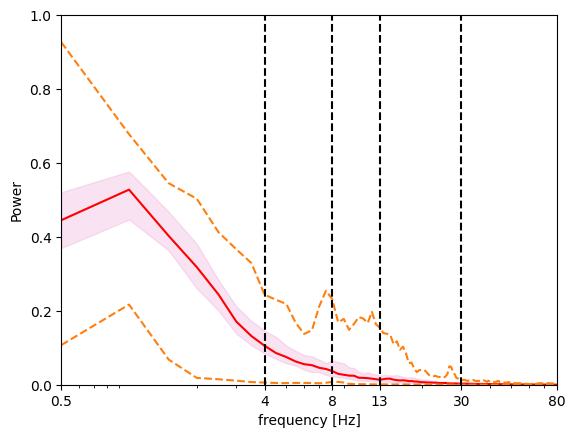

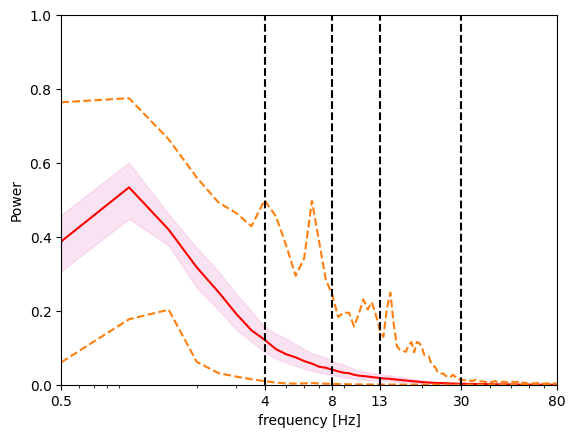

In [55]:
# Extract median, mean and std
median_class = {}
std_class = {}
mean_class = {}
for type_signal in psd_class:
    # Extract data
    # print(region)
    psd = psd_class[type_signal]
    f = f_class[type_signal]
    # # Plot and save the median curve
    median, mean, std = plotPaperFigures(f, psd, show_fig=True)
    median_class[type_signal] = median
    std_class[type_signal] = std
    mean_class[type_signal] = mean

In [111]:
# Mask based on quantiles
mask = np.quantile(psd_class['normal'], [0.1, 0.9], axis=0)
mask.shape

(2, 159)

In [153]:
mask_f = f_class['normal']>=0
mask_init = mask[:,mask_f]

In [113]:
psd_class['normal'].shape

(42, 159)

In [114]:
idx =20
test_psd = psd_class['normal'][:,idx]
test_psd = test_psd[(test_psd>=mask[0,idx])*(test_psd<=mask[1,idx])]
test_psd.shape

(32,)

In [154]:
caca = 0
for signal in psd_class['normal']: 
    result_mask = (signal[mask_f]>=mask_init[0,:])*(signal[mask_f]<=mask_init[1,:])
    # print(result_mask)
    if len(result_mask[result_mask])> 0.80*len(result_mask):
        caca+=1
caca

20

In [122]:
psd_class['abnormal'].shape

(252, 159)

In [155]:
caca = 0
for signal in psd_class['abnormal']: 
    result_mask = (signal[mask_f]>=mask_init[0,:])*(signal[mask_f]<=mask_init[1,:])
    if len(result_mask[result_mask])> 0.80*len(result_mask):
        caca+=1
caca

138

In [156]:
# Mask based on std
welchpow = psd_class['normal']
n_samples = welchpow.shape[1]
std = np.zeros(n_samples)
mean = np.zeros(n_samples)
for i in range(n_samples):
    (mean[i], std[i]) = scipy.stats.norm.fit(welchpow[:,i].squeeze())
# Get 2 std away
mask_up = mean+std
mask_down = mean-std

In [157]:
caca = 0
for signal in welchpow: 
    result_mask = (signal>=mask_down)*(signal<=mask_up)
    if len(result_mask[result_mask])> 0.80*len(result_mask):
        caca+=1
caca

30

In [158]:
caca = 0
for signal in psd_class['abnormal']: 
    result_mask = (signal>=mask_down)*(signal<=mask_up)
    if len(result_mask[result_mask])> 0.80*len(result_mask):
        caca+=1
caca

176

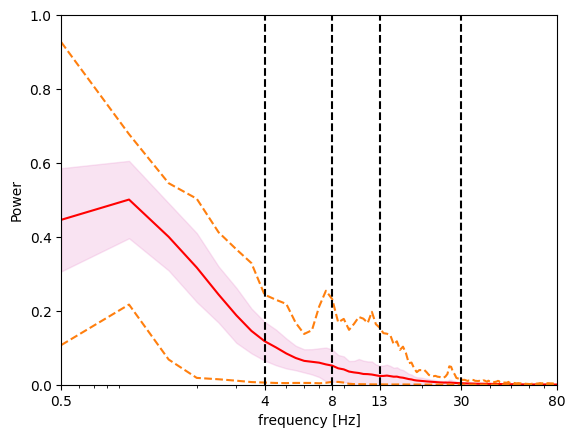

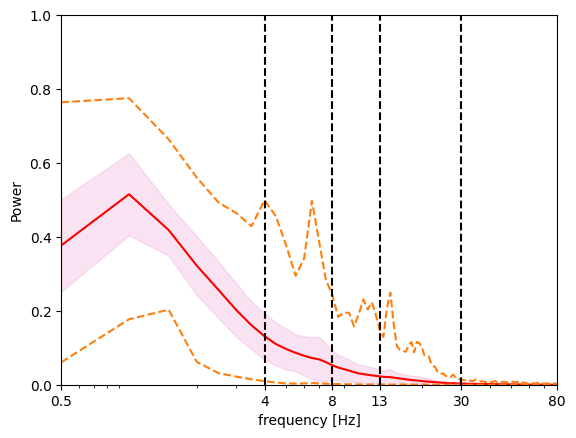

In [46]:
# Extract median, mean and std
median_class = {}
std_class = {}
mean_class = {}
for type_signal in psd_class:
    # Extract data
    # print(region)
    psd = psd_class[type_signal]
    f = f_class[type_signal]
    # # Plot and save the median curve
    _ = plotAlternativeFigures(f, psd, show_fig=True)

In [169]:
mean_class['normal'].shape

(159,)

In [36]:
# Extract errors per band
# extract the MAD
MAD_class = {}
for type_signal in psd_class:
    psd = psd_class[type_signal]
    MAD_class[type_signal] = np.median(np.abs(np.subtract(psd,median_class[type_signal])), axis=0)

In [37]:
def errorModifiedZScore(median, MAD, y_pred):
    # Center signal
    y_centered = np.subtract(y_pred, median)
    N = len(y_pred)
    return np.sum(np.divide(y_centered, MAD, out=np.zeros_like(y_centered), where=MAD!=0))/N

In [84]:
# Using the RMSE (ALWAYS against normal class)
errors_class = {
    'normal' : [],
    'abnormal' : []
}
for type_signal in psd_class:
    # Extract data per signal
    for idx, psd in enumerate(psd_class[type_signal]):
        # print(psd.shape)
        # Calculate error per freq band
        freq_bands = [0.5,4,8,13,30,80]
        rmse_bands = []
        for i in range(len(freq_bands)-1):
            idx0 = np.argmin(np.abs(f_class[type_signal]-freq_bands[i]))
            idx1 = np.argmin(np.abs(f_class[type_signal]-freq_bands[i+1]))
            # rmse_bands.append(error_std(mean_region[region][idx0:idx1], std_region[region][idx0:idx1], psd[idx0:idx1].squeeze()))
            rmse_bands.append(errorModifiedZScore(median_class['normal'][idx0:idx1], MAD_class['normal'][idx0:idx1], psd[idx0:idx1].squeeze()))
        tmp_dict = {
            'Error Delta': np.round(rmse_bands[0], decimals=4),
            'Error Theta': np.round(rmse_bands[1], decimals=4),
            'Error Alpha': np.round(rmse_bands[2], decimals=4),
            'Error Beta': np.round(rmse_bands[3], decimals=4),
            'Error Gamma': np.round(rmse_bands[4], decimals=4)
        }
        errors_class[type_signal].append(tmp_dict)

In [85]:
len(errors_class['normal'])

42

In [40]:
# Get bandpower per freq band
def bandpower(Pxx, f, fmin, fmax):
    ind_min = np.argmax(f > fmin) - 1
    ind_max = np.argmax(f > fmax) - 1
    return np.trapz(Pxx[ind_min: ind_max], f[ind_min: ind_max])

In [41]:
from sklearn.preprocessing import normalize
bandpower_class = {
    'normal' : [],
    'abnormal' : []
}
for type_signal in psd_class:
    # Extract data per signal
    for idx, psd in enumerate(psd_class[type_signal]):
        # print(psd.shape)
        # Calculate error per freq band
        freq_bands = [0.5,4,8,13,30,80]
        bandpow_bands = []
        for i, band in enumerate(tmp_dict): 
            bandpow = bandpower(psd.squeeze(), f_class[type_signal], freq_bands[i], freq_bands[i+1])
            bandpow_bands.append(np.round(bandpow, decimals=4))
        # Normalize (used l1 as it's based on Euclidean distance, same as here: https://github.com/jbernabei/iEEG_atlas/blob/main/support_files/create_univariate_atlas.m#L1)
        bandpow_bands = np.array([bandpow_bands])
        bandpow_bands = normalize(bandpow_bands, norm='l1')
        tmp_dict = {
            'Bandpower Delta': bandpow_bands.squeeze()[0],
            'Bandpower Theta': bandpow_bands.squeeze()[1],
            'Bandpower Alpha': bandpow_bands.squeeze()[2],
            'Bandpower Beta': bandpow_bands.squeeze()[3],
            'Bandpower Gamma': bandpow_bands.squeeze()[4]
        }
        bandpower_class[type_signal].append(tmp_dict)

In [43]:
len(bandpower_class['normal'])

42

In [72]:
# Calculate critical slowing features: std dev and autocorrelation
standard_dev_class = dict()
autocorr_class = dict()
for type_signal in signals_class:
    standard_dev_class[type_signal] =np.std(signals_class[type_signal], axis=0)
    autocorr_list = []
    for signal in signals_class[type_signal].T:
        autocorr = np.correlate(signal, signal, mode='full')
        # Grabbing the mean value (not sure if the best)
        autocorr_list.append(np.mean(np.abs(autocorr[int(autocorr.size/2):])))
    autocorr_class[type_signal] = np.array(autocorr_list)

In [73]:
autocorr_class['normal'].shape

(42,)

In [59]:
np.abs(caca[int(caca.size/2):])

array([3.07255684e+06, 2.93372655e+06, 2.65034363e+06, ...,
       3.27380931e+02, 1.69757171e+02, 7.01251702e+01])

In [88]:
# Build dataframes and put them together
df_bandpower_normal = pd.DataFrame(bandpower_class['normal'])
df_errors_normal = pd.DataFrame(errors_class['normal'])
df_normal = pd.concat((df_bandpower_normal, df_errors_normal), axis=1)
df_normal['std_dev'] = standard_dev_class['normal']
df_normal['autocorr'] = autocorr_class['normal']
df_normal['type'] = 'normal'
df_normal.head()

Bandpower Delta  Bandpower Theta  Bandpower Alpha  Bandpower Beta  \
0         0.529104         0.242188         0.121486        0.079632   
1         0.715899         0.165930         0.045717        0.050344   
2         0.719074         0.148713         0.055490        0.049571   
3         0.618975         0.169113         0.091557        0.082100   
4         0.472009         0.133145         0.136296        0.167763   

   Bandpower Gamma  Error Delta  Error Theta  Error Alpha  Error Beta  \
0         0.027589       1.1218       3.4894       2.7458      0.5835   
1         0.022110       0.3847       0.2687      -0.7194     -0.7522   
2         0.027153      -0.1588      -0.2515      -0.5635     -0.9347   
3         0.038256       0.0344       0.8293       1.0149     -0.0940   
4         0.090787       0.3254       0.7987       4.1280      4.2804   

   Error Gamma    std_dev       autocorr    type  
0      -0.2983  16.001448   42443.328912  normal  
1      -0.9401  46.695106  621087.822919  normal  
2      -0.5468   5.857184    9433.892904  normal  
3       0.5604  63.068069  880977.843435  normal  
4       5.7093  10.980932   20421.993133  normal

In [89]:
# Build dataframes and put them together
df_bandpower_abnormal = pd.DataFrame(bandpower_class['abnormal'])
df_errors_abnormal = pd.DataFrame(errors_class['abnormal'])
df_abnormal = pd.concat((df_bandpower_abnormal, df_errors_abnormal), axis=1)
df_abnormal['std_dev'] = standard_dev_class['abnormal']
df_abnormal['autocorr'] = autocorr_class['abnormal']
df_abnormal['type'] = 'abnormal'
df_abnormal.head()

Bandpower Delta  Bandpower Theta  Bandpower Alpha  Bandpower Beta  \
0         0.564867         0.132401         0.088544        0.147692   
1         0.371120         0.175357         0.300308        0.130204   
2         0.316360         0.147722         0.166862        0.335002   
3         0.644473         0.179060         0.060983        0.101167   
4         0.517624         0.174440         0.085638        0.195910   

   Bandpower Gamma  Error Delta  Error Theta  Error Alpha  Error Beta  \
0         0.066497      -0.3502      -0.0498       1.0118      2.5470   
1         0.023010      -0.7278       2.5830      11.9768      2.3723   
2         0.034054       0.1635       2.7710       8.3406     13.3507   
3         0.014318       1.1359       1.1571       0.1199      0.9520   
4         0.026388       1.1605       1.9609       1.7734      4.9001   

   Error Gamma    std_dev       autocorr      type  
0       1.9384  22.211759  130161.205120  abnormal  
1      -0.1848  24.532553  103848.788619  abnormal  
2       0.8170  69.496572  625297.269838  abnormal  
3      -1.3698  63.579562  865945.110613  abnormal  
4      -0.4685  42.162857  349260.598285  abnormal

In [90]:
df_all = pd.concat((df_normal, df_abnormal), axis=0)
df_all.head()

Bandpower Delta  Bandpower Theta  Bandpower Alpha  Bandpower Beta  \
0         0.529104         0.242188         0.121486        0.079632   
1         0.715899         0.165930         0.045717        0.050344   
2         0.719074         0.148713         0.055490        0.049571   
3         0.618975         0.169113         0.091557        0.082100   
4         0.472009         0.133145         0.136296        0.167763   

   Bandpower Gamma  Error Delta  Error Theta  Error Alpha  Error Beta  \
0         0.027589       1.1218       3.4894       2.7458      0.5835   
1         0.022110       0.3847       0.2687      -0.7194     -0.7522   
2         0.027153      -0.1588      -0.2515      -0.5635     -0.9347   
3         0.038256       0.0344       0.8293       1.0149     -0.0940   
4         0.090787       0.3254       0.7987       4.1280      4.2804   

   Error Gamma    std_dev       autocorr    type  
0      -0.2983  16.001448   42443.328912  normal  
1      -0.9401  46.695106  621087.822919  normal  
2      -0.5468   5.857184    9433.892904  normal  
3       0.5604  63.068069  880977.843435  normal  
4       5.7093  10.980932   20421.993133  normal

In [93]:
# Save
df_all.to_csv('all_features.tsv', sep='\t')

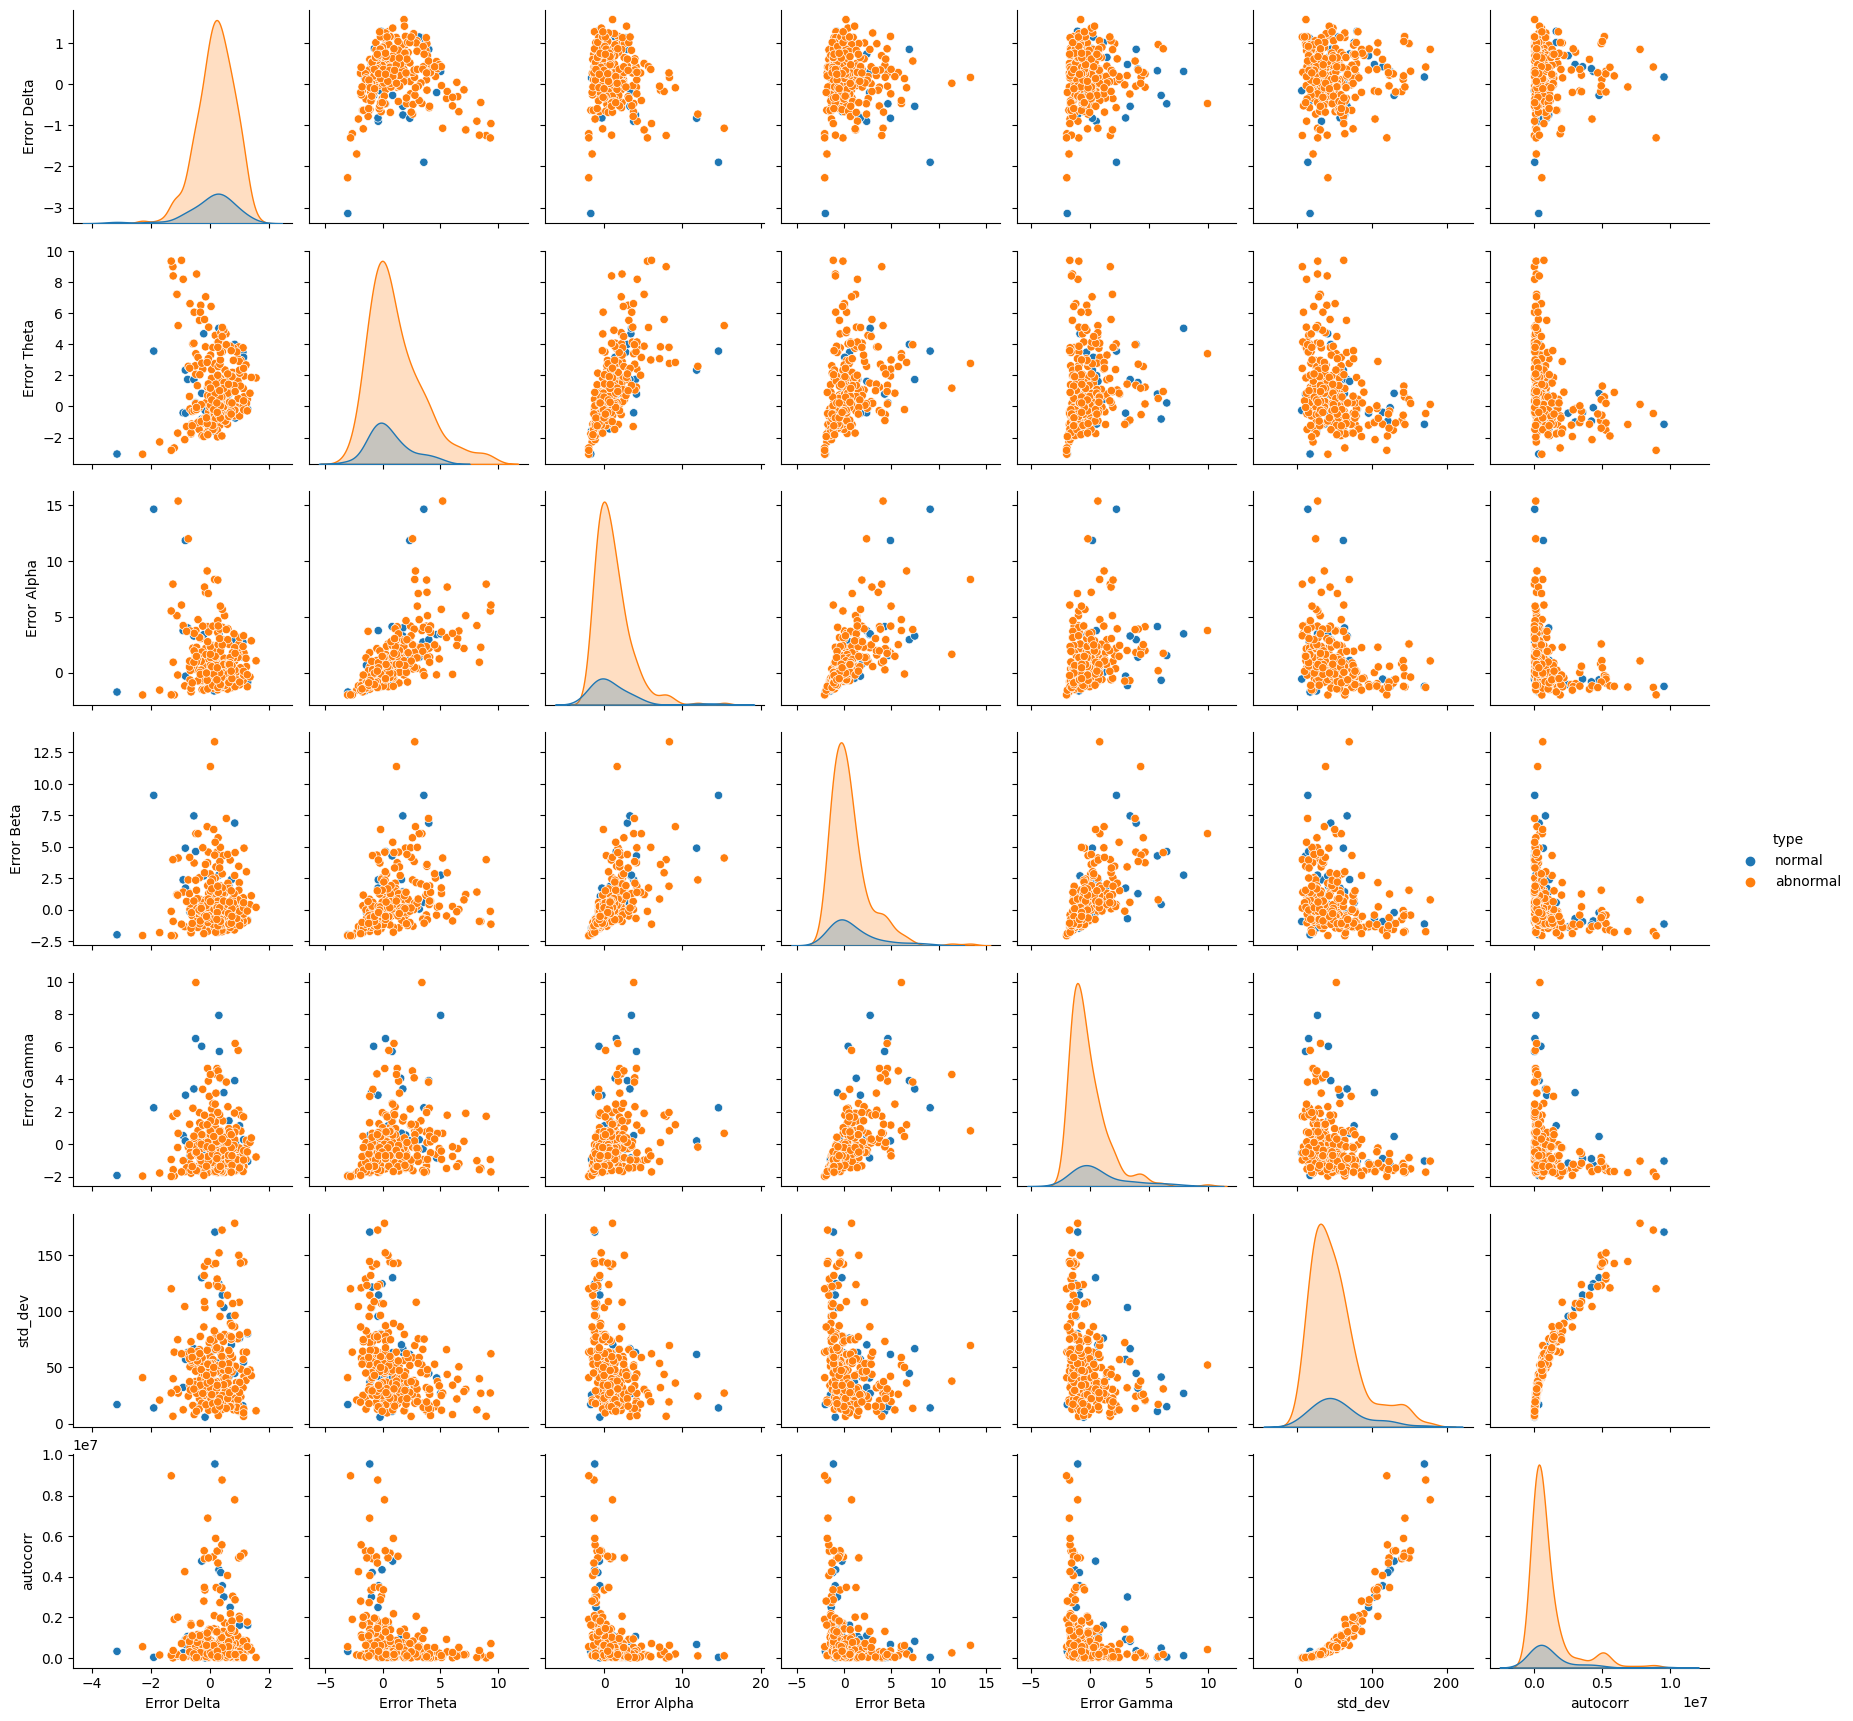

In [165]:
import seaborn as sns
sns.pairplot(df_all.drop(['Bandpower Delta', 'Bandpower Theta', 'Bandpower Alpha', 'Bandpower Beta', 'Bandpower Gamma'], axis=1), hue="type")


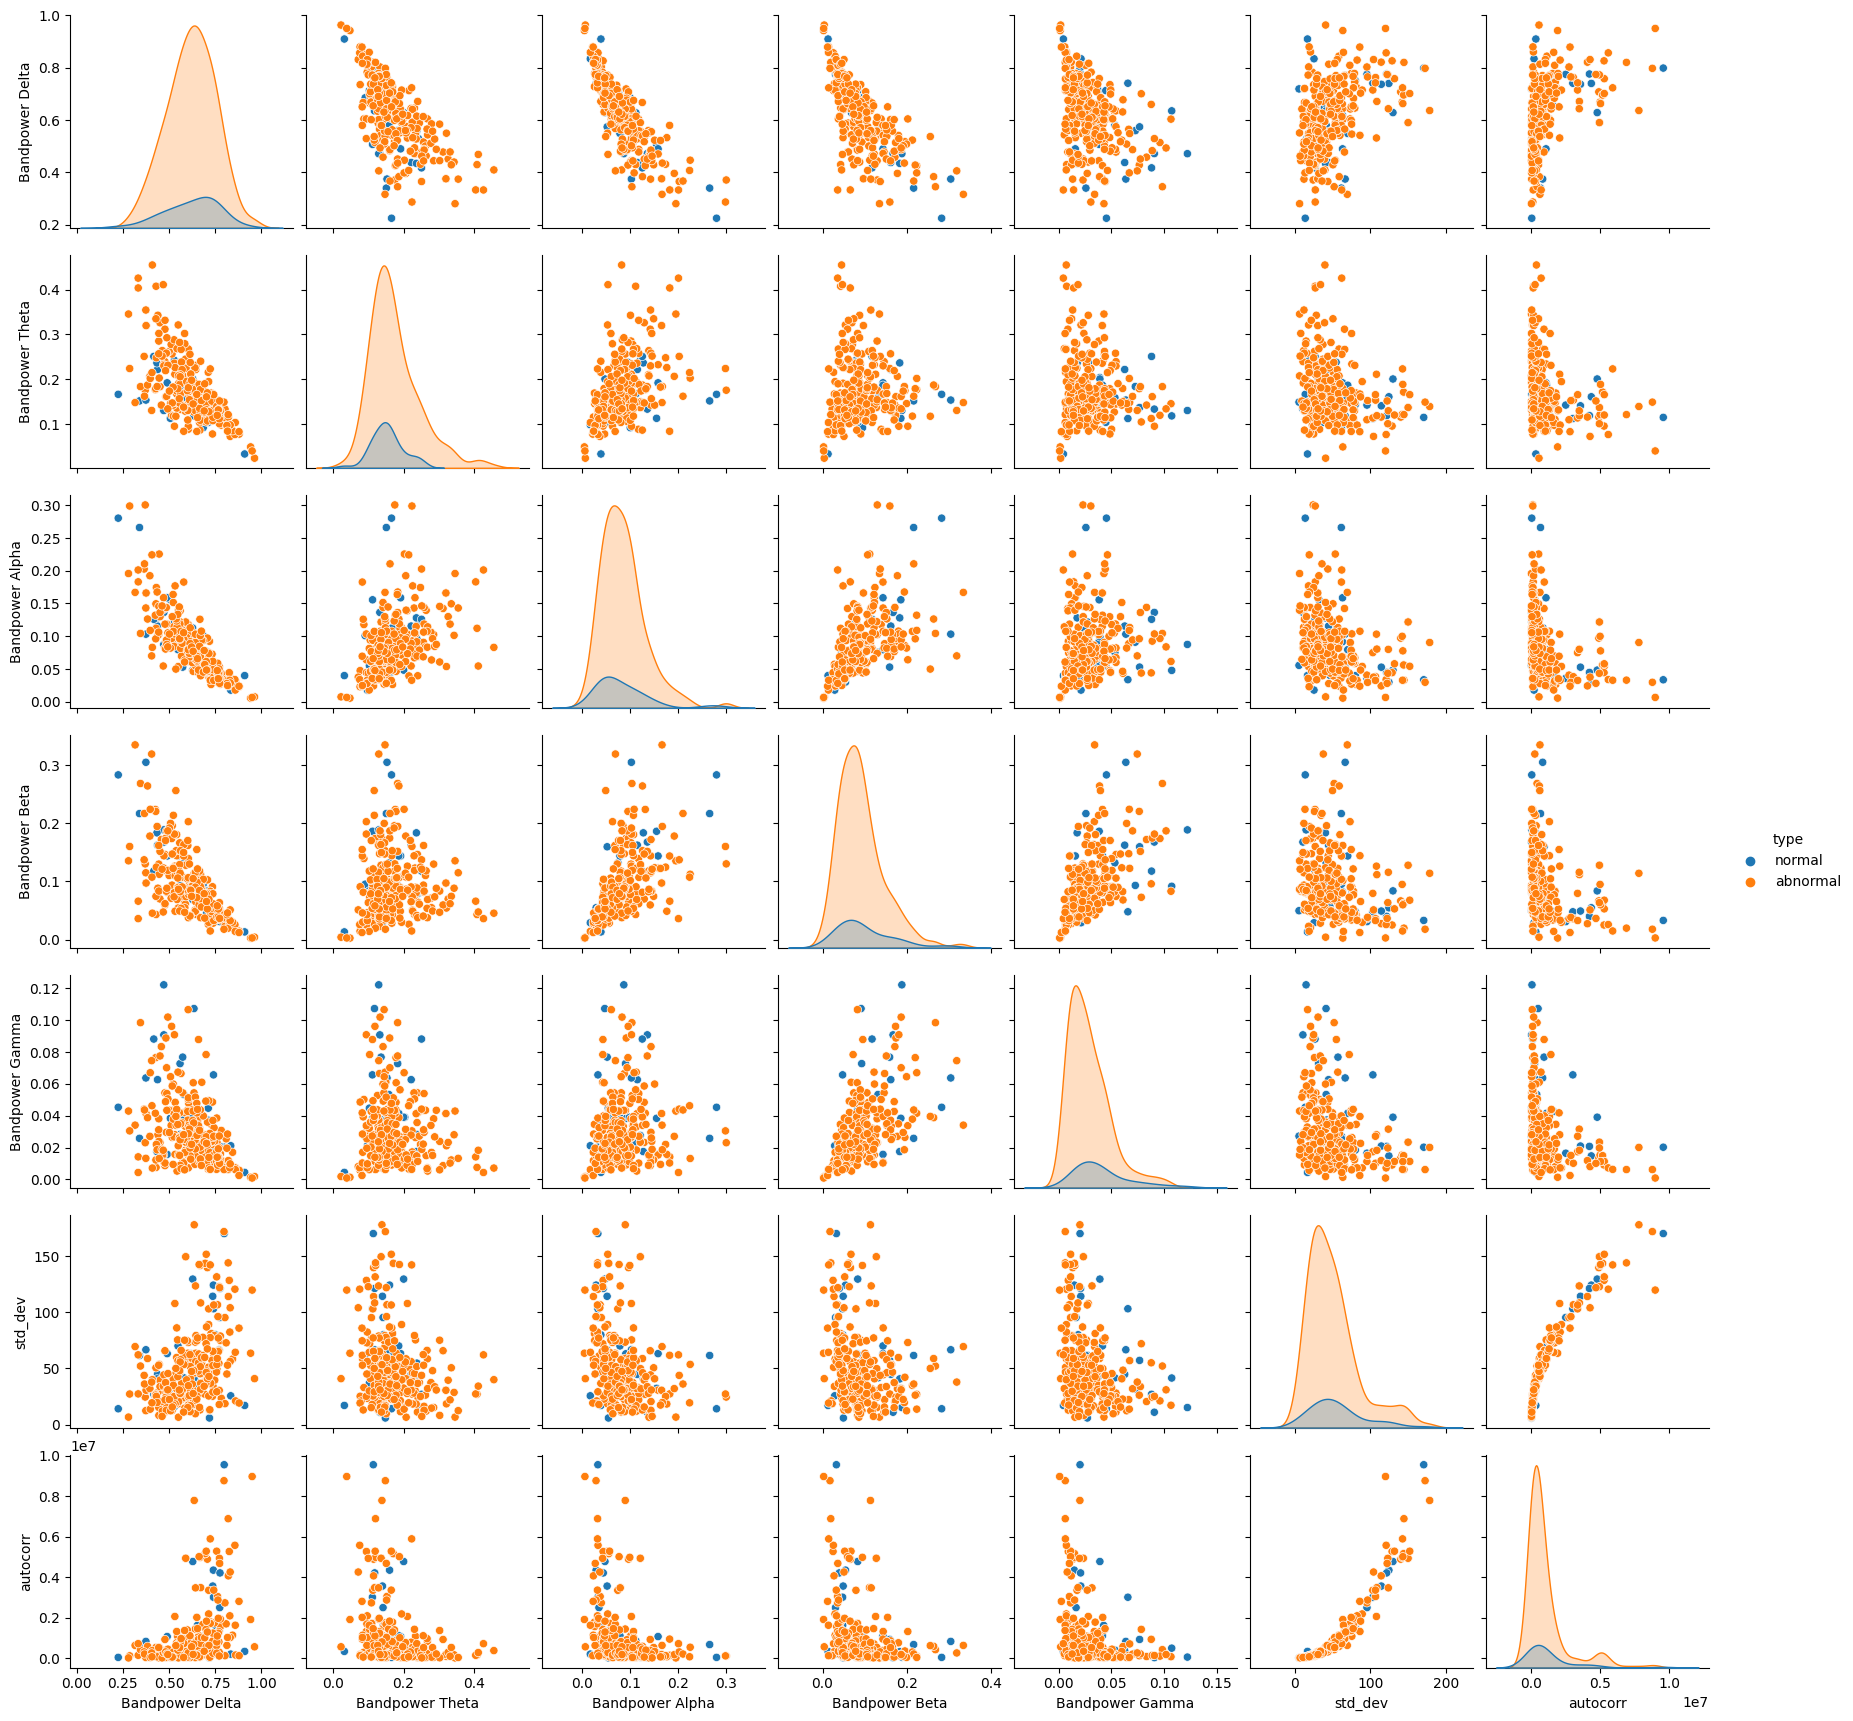

In [166]:
sns.pairplot(df_all.drop(['Error Delta', 'Error Theta', 'Error Alpha', 'Error Beta', 'Error Gamma'], axis=1), hue="type")

## Try PCA

In [101]:
from sklearn.decomposition import PCA
import plotly.express as px

### Case 1: Bandpower

In [128]:
features_df = df_all.loc[:, ['Bandpower Delta', 'Bandpower Theta', 'Bandpower Alpha', 'Bandpower Beta', 'Bandpower Gamma']].to_numpy()
features_df.shape

(294, 5)

In [129]:
# Normalize first
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features_df)
features

array([[-0.67824497,  1.04301138,  0.75209965, -0.23730184, -0.13641674],
       [ 0.72653502, -0.08131247, -0.83753754, -0.75321577, -0.39121464],
       [ 0.75040981, -0.33515255, -0.63251131, -0.76682644, -0.15669763],
       ...,
       [-1.59188387,  0.63681778,  2.90596976,  0.25077624,  0.73173106],
       [-0.94567703, -0.55571152, -0.0401773 ,  1.65436675,  3.32221758],
       [ 0.26484171, -0.84361093, -0.41686892,  0.50078222,  0.62518391]])

In [130]:
# Try PCA on PSD 
# Apply PCA on training data and get the explained variance [ / 4 marks]
PCA_alg = PCA() # 64 is the minimum between the training examples and the # of features
PCA_alg.fit(features)

# Print the variance:
total_variance = np.sum(PCA_alg.explained_variance_ratio_)*100
print('The total explained variance using %i components is %.3f percent.' % (PCA_alg.n_components_, total_variance))

# Plotting explained variance with number of concepts [ / 4 marks]
exp_var_ratio = PCA_alg.explained_variance_ratio_
#
cum_sum_var = np.cumsum(exp_var_ratio)

# To get the exact index where the variance is above 80%
id = np.argmax(cum_sum_var > 0.8)+1
print(f'The minimum number of components to get a variance above 80% is {id:.3f}, with a value of {cum_sum_var[id-1]*100:.3f}%')

The total explained variance using 5 components is 100.000 percent.
The minimum number of components to get a variance above 80% is 2.000, with a value of 83.143%


In [131]:
# Create PCA with 3 features to visualize (preserves more than 80% of variance)
# Get results
PCA_vis = PCA(n_components = 3)
psd_vis = PCA_vis.fit_transform(features)
psd_vis.shape

(294, 3)

In [132]:
features_plot = [f'{k+1} component' for k in range(3)]
df_plot = pd.DataFrame(data = psd_vis, columns = features_plot)
df_plot['type'] = df_all['type'].values
df_plot.head()

1 component  2 component  3 component    type
0     0.953925     1.072288    -0.223325  normal
1    -1.337650     0.241429    -0.313889  normal
2    -1.267986    -0.019321    -0.216580  normal
3     0.066716    -0.138887    -0.192702  normal
4     2.437143    -2.273636    -0.532115  normal

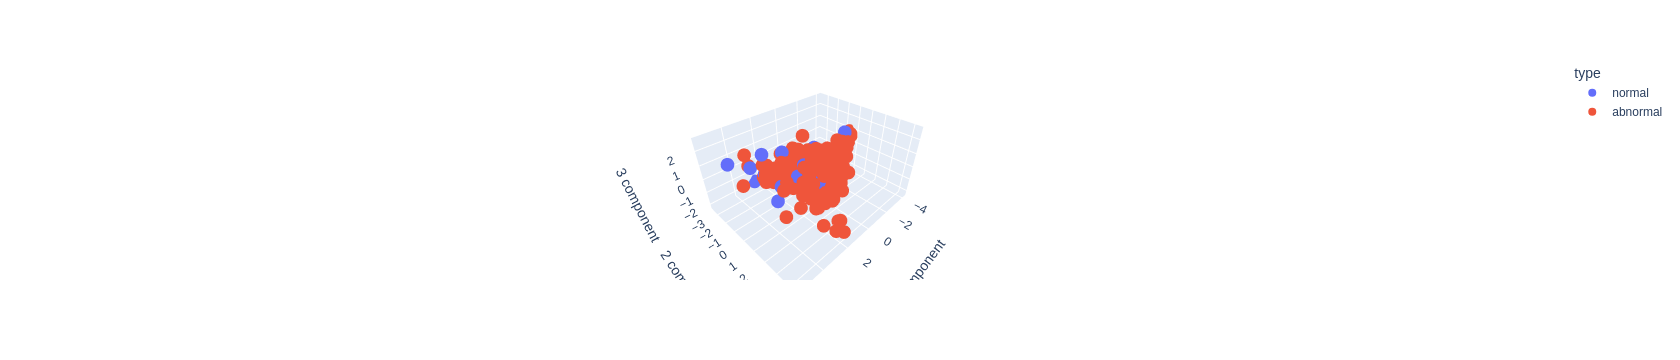

In [133]:
fig = px.scatter_3d(df_plot, x='1 component', y='2 component', z='3 component', color = 'type')
fig.show()
# Doesn't perform amazing

### Case 2: Errors

In [134]:
features_df = df_all.loc[:, ['Error Delta', 'Error Theta', 'Error Alpha', 'Error Beta', 'Error Gamma']].to_numpy()
features_df.shape

(294, 5)

In [135]:
# Normalize first
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features_df)
features.shape

(294, 5)

In [136]:
# Try PCA on PSD 
# Apply PCA on training data and get the explained variance [ / 4 marks]
PCA_alg = PCA() # 64 is the minimum between the training examples and the # of features
PCA_alg.fit(features)

# Print the variance:
total_variance = np.sum(PCA_alg.explained_variance_ratio_)*100
print('The total explained variance using %i components is %.3f percent.' % (PCA_alg.n_components_, total_variance))

# Plotting explained variance with number of concepts [ / 4 marks]
exp_var_ratio = PCA_alg.explained_variance_ratio_
#
cum_sum_var = np.cumsum(exp_var_ratio)

# To get the exact index where the variance is above 80%
id = np.argmax(cum_sum_var > 0.8)+1
print(f'The minimum number of components to get a variance above 80% is {id:.3f}, with a value of {cum_sum_var[id-1]*100:.3f}%')
print(f'Variance with 3 components {cum_sum_var[3]*100:.3f}%')

The total explained variance using 5 components is 100.000 percent.
The minimum number of components to get a variance above 80% is 3.000, with a value of 87.656%
Variance with 3 components 96.189%


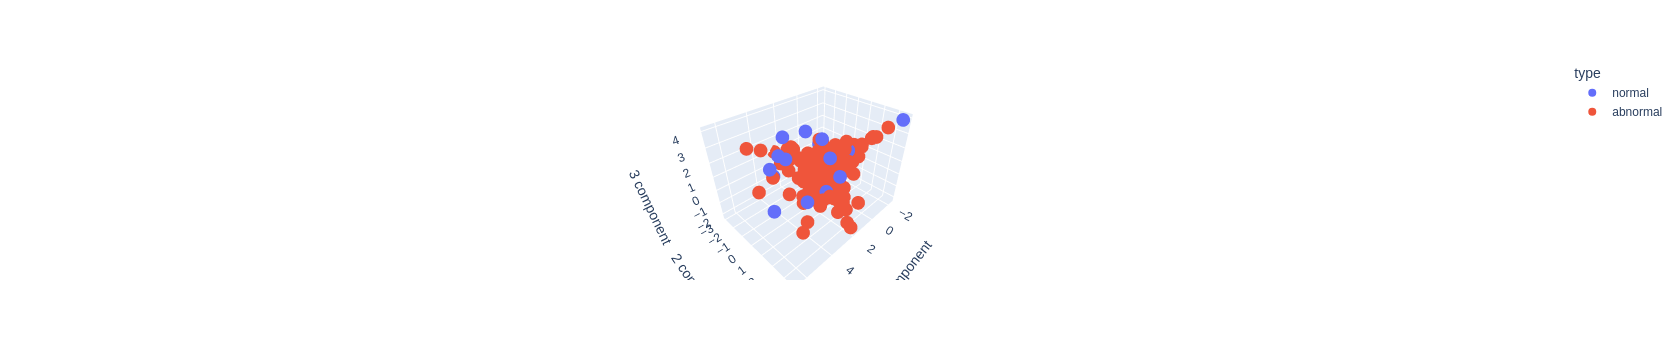

In [137]:
# Create PCA with 3 features to visualize (preserves more than 80% of variance)
# Get results
PCA_vis = PCA(n_components = 3)
psd_vis = PCA_vis.fit_transform(features)
features_plot = [f'{k+1} component' for k in range(3)]
df_plot = pd.DataFrame(data = psd_vis, columns = features_plot)
df_plot['type'] = df_all['type'].values
fig = px.scatter_3d(df_plot, x='1 component', y='2 component', z='3 component', color = 'type')
fig.show()
# Not amazing as well but I think better than la

### Case 3: Errors + std_dev + autocorr

In [138]:
features_df = df_all.loc[:, ['Error Delta', 'Error Theta', 'Error Alpha', 'Error Beta', 'Error Gamma', 'std_dev', 'autocorr']].to_numpy()
features_df.shape

(294, 7)

In [140]:
# Normalize first
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features_df)
features.shape

(294, 7)

In [141]:
# Try PCA on PSD 
# Apply PCA on training data and get the explained variance [ / 4 marks]
PCA_alg = PCA() # 64 is the minimum between the training examples and the # of features
PCA_alg.fit(features)

# Print the variance:
total_variance = np.sum(PCA_alg.explained_variance_ratio_)*100
print('The total explained variance using %i components is %.3f percent.' % (PCA_alg.n_components_, total_variance))

# Plotting explained variance with number of concepts [ / 4 marks]
exp_var_ratio = PCA_alg.explained_variance_ratio_
#
cum_sum_var = np.cumsum(exp_var_ratio)

# To get the exact index where the variance is above 80%
id = np.argmax(cum_sum_var > 0.8)+1
print(f'The minimum number of components to get a variance above 80% is {id:.3f}, with a value of {cum_sum_var[id-1]*100:.3f}%')
print(f'Variance with 3 components {cum_sum_var[3]*100:.3f}%')

The total explained variance using 7 components is 100.000 percent.
The minimum number of components to get a variance above 80% is 4.000, with a value of 90.415%
Variance with 3 components 90.415%


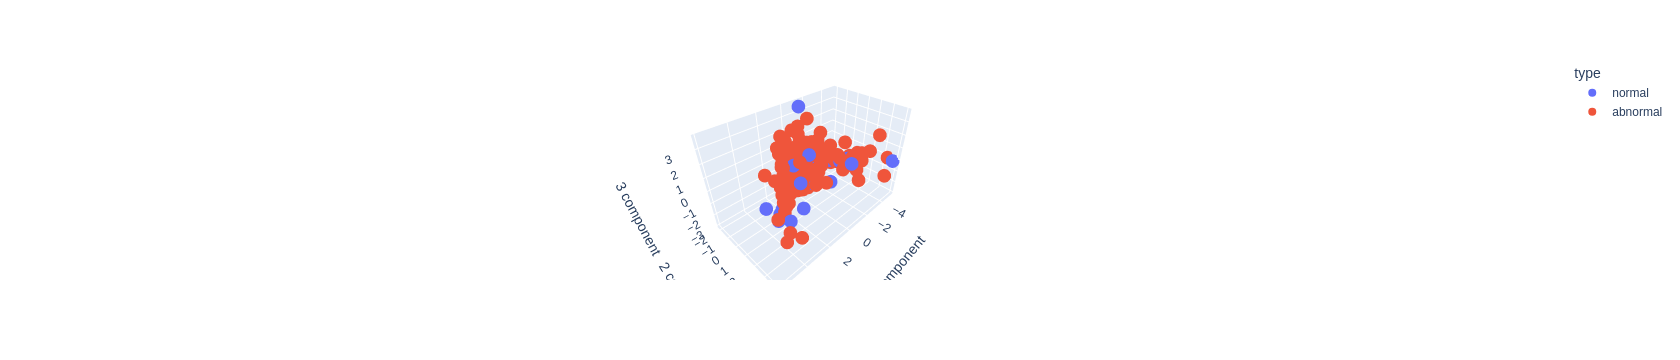

In [142]:
# Create PCA with 3 features to visualize (preserves more than 80% of variance)
# Get results
PCA_vis = PCA(n_components = 3)
psd_vis = PCA_vis.fit_transform(features)
features_plot = [f'{k+1} component' for k in range(3)]
df_plot = pd.DataFrame(data = psd_vis, columns = features_plot)
df_plot['type'] = df_all['type'].values
fig = px.scatter_3d(df_plot, x='1 component', y='2 component', z='3 component', color = 'type')
fig.show()
# Not amazing as well but I think better 

### Case 4: Bandpower + std_dev + autocorr

In [143]:
features_df = df_all.loc[:, ['Bandpower Delta', 'Bandpower Theta', 'Bandpower Alpha', 'Bandpower Beta', 'Bandpower Gamma', 'std_dev', 'autocorr']].to_numpy()
features_df.shape

(294, 7)

In [144]:
# Normalize first
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features_df)
features.shape

(294, 7)

In [145]:
# Try PCA on PSD 
# Apply PCA on training data and get the explained variance [ / 4 marks]
PCA_alg = PCA() # 64 is the minimum between the training examples and the # of features
PCA_alg.fit(features)

# Print the variance:
total_variance = np.sum(PCA_alg.explained_variance_ratio_)*100
print('The total explained variance using %i components is %.3f percent.' % (PCA_alg.n_components_, total_variance))

# Plotting explained variance with number of concepts [ / 4 marks]
exp_var_ratio = PCA_alg.explained_variance_ratio_
#
cum_sum_var = np.cumsum(exp_var_ratio)

# To get the exact index where the variance is above 80%
id = np.argmax(cum_sum_var > 0.8)+1
print(f'The minimum number of components to get a variance above 80% is {id:.3f}, with a value of {cum_sum_var[id-1]*100:.3f}%')
print(f'Variance with 3 components {cum_sum_var[3]*100:.3f}%')

The total explained variance using 7 components is 100.000 percent.
The minimum number of components to get a variance above 80% is 3.000, with a value of 87.388%
Variance with 3 components 95.327%


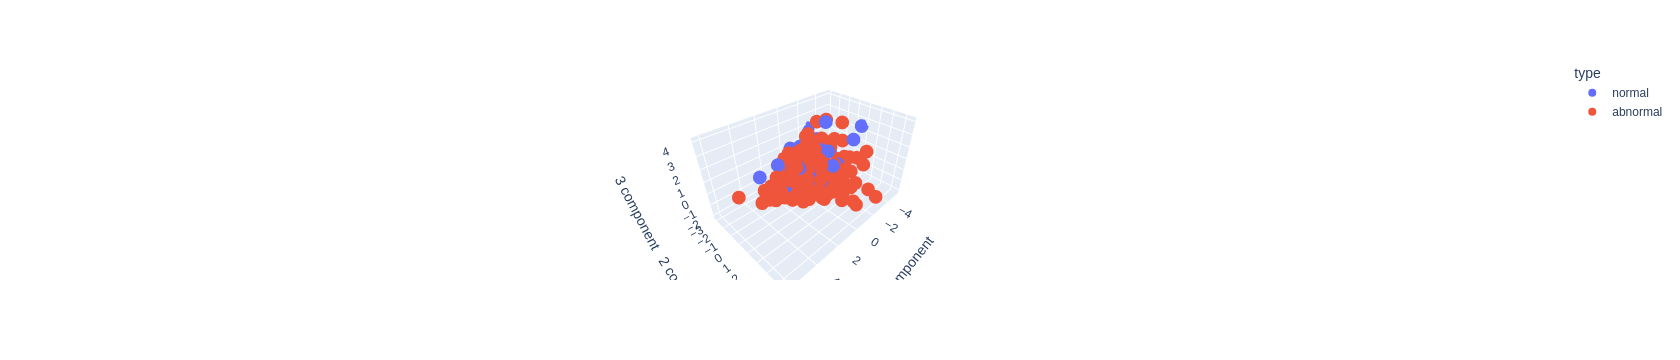

In [146]:
# Create PCA with 3 features to visualize (preserves more than 80% of variance)
# Get results
PCA_vis = PCA(n_components = 3)
psd_vis = PCA_vis.fit_transform(features)
features_plot = [f'{k+1} component' for k in range(3)]
df_plot = pd.DataFrame(data = psd_vis, columns = features_plot)
df_plot['type'] = df_all['type'].values
fig = px.scatter_3d(df_plot, x='1 component', y='2 component', z='3 component', color = 'type')
fig.show()
# Not amazing as well but I think better than la

### Case 5: all features

In [153]:
features_df = df_all.drop(['type'], axis=1).to_numpy()
features_df.shape

(294, 12)

In [154]:
# Normalize first
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features_df)
features.shape

(294, 12)

In [155]:
# Try PCA on PSD 
# Apply PCA on training data and get the explained variance [ / 4 marks]
PCA_alg = PCA() # 64 is the minimum between the training examples and the # of features
PCA_alg.fit(features)

# Print the variance:
total_variance = np.sum(PCA_alg.explained_variance_ratio_)*100
print('The total explained variance using %i components is %.3f percent.' % (PCA_alg.n_components_, total_variance))

# Plotting explained variance with number of concepts [ / 4 marks]
exp_var_ratio = PCA_alg.explained_variance_ratio_
#
cum_sum_var = np.cumsum(exp_var_ratio)

# To get the exact index where the variance is above 80%
id = np.argmax(cum_sum_var > 0.8)+1
print(f'The minimum number of components to get a variance above 80% is {id:.3f}, with a value of {cum_sum_var[id-1]*100:.3f}%')
print(f'Variance with 3 components {cum_sum_var[3]*100:.3f}%')

The total explained variance using 12 components is 100.000 percent.
The minimum number of components to get a variance above 80% is 4.000, with a value of 88.326%
Variance with 3 components 88.326%


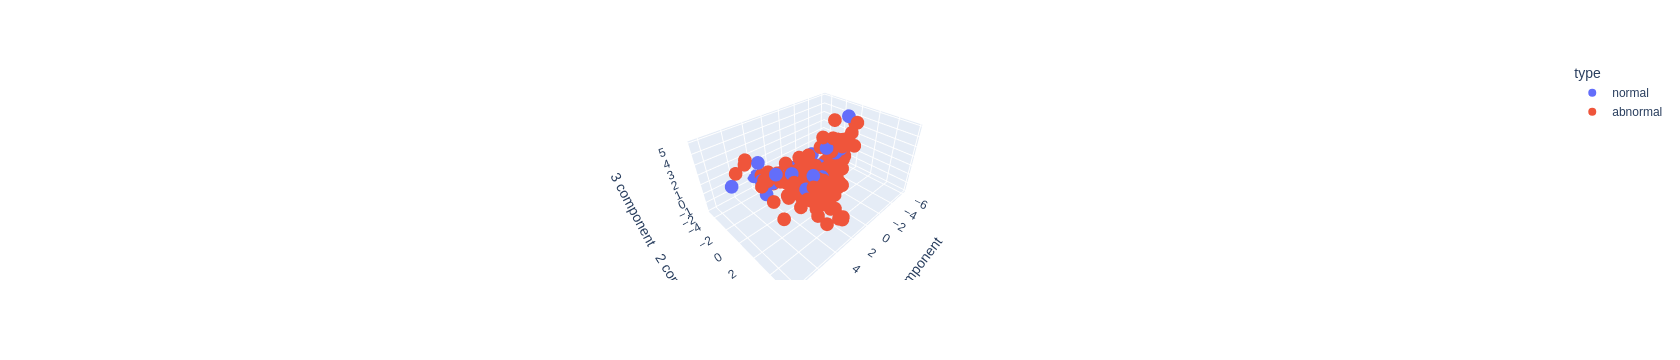

In [156]:
# Create PCA with 3 features to visualize (preserves more than 80% of variance)
# Get results
PCA_vis = PCA(n_components = 3)
psd_vis = PCA_vis.fit_transform(features)
features_plot = [f'{k+1} component' for k in range(3)]
df_plot = pd.DataFrame(data = psd_vis, columns = features_plot)
df_plot['type'] = df_all['type'].values
fig = px.scatter_3d(df_plot, x='1 component', y='2 component', z='3 component', color = 'type')
fig.show()
# Not amazing as well but I think better than la

In [162]:
# t-sne
from sklearn.manifold import TSNE
tSNEmapper = TSNE(n_components=3,               # How many dimensions to use. Never more than 2 or 3
                  init='random',                # First initialization. Sparse matrices need 'random'.  Otherwise use 'pca'
                  perplexity=100.0,              # Read below
                  early_exaggeration=12.0,      # Read below
                  learning_rate='auto',         # Related to above. Leave to auto
                  n_iter=5000,                  # Very important to let iterate enough
                  n_iter_without_progress=300,  # Set early stopping
                  metric='cosine',           # Metric to use to calculate distances.
                  min_grad_norm=1e-7,           # Minimum gradient to continue iterating
                  verbose=0,                    # Verbosity
                  random_state=42,              # Random seed
                  n_jobs=4,                     # Parallel processes
                 )
TSNE_embedding = tSNEmapper.fit_transform(features)
features_plot = [f'{k+1} component' for k in range(3)]
df_plot = pd.DataFrame(data = TSNE_embedding, columns = features_plot)
df_plot['type'] = df_all['type'].values
fig = px.scatter_3d(df_plot, x='1 component', y='2 component', z='3 component', color = 'type')
fig.show()

In [164]:
# UMAP
import umap
import umap.plot
# UMAP
# Let's create the object
reducer = umap.UMAP(n_neighbors=15,              # Number of neareast neighbours to use. 
                    n_components=3,              # Number of components. UMAP is robust to larger values
                    # metric='hellinger',          # Metric to use.
                    n_epochs=None,               # Iterations. Set to convergence. None implies either 200 or 500.
                    min_dist=0.1,                # Minimum distance embedded points. Smaller makes clumps, larger, sparseness.
                    spread=1.0,                  # Scale to combine with min_dist
                    low_memory=True,             # Run slower, but with less memory.
                    n_jobs=-1,                   # Cores to use
                    random_state=42,             # Random seed
                    verbose=True                 # Verbosity
                   )

# Now we train and calculate the embedding!
UMAP_embedding = reducer.fit_transform(features)
features_plot = [f'{k+1} component' for k in range(3)]
df_plot = pd.DataFrame(data = UMAP_embedding, columns = features_plot)
df_plot['type'] = df_all['type'].values
fig = px.scatter_3d(df_plot, x='1 component', y='2 component', z='3 component', color = 'type')
fig.show()

UMAP(n_components=3, random_state=42, verbose=True)
Tue Aug 15 13:57:56 2023 Construct fuzzy simplicial set
Tue Aug 15 13:57:57 2023 Finding Nearest Neighbors
Tue Aug 15 13:58:00 2023 Finished Nearest Neighbor Search
Tue Aug 15 13:58:02 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Tue Aug 15 13:58:04 2023 Finished embedding


# Training CNN

## Rebuild the data

In [26]:
# This is highly skewed data so I will drop a few examples. I'll rebuild the data
# I'll used 3 classes: abnormal vs normal vs resected or bad outcome. Will drop the last class
# Will rebuild the masks
HUP_mask_abnormal = soz_ch | spike_mask
HUP_drop = (resected_ch | HUP_outcome_mask) * ~HUP_mask_abnormal
HUP_normal_mask = ~(HUP_mask_abnormal | HUP_drop)

In [27]:
len(HUP_normal_mask[HUP_normal_mask])

532

In [28]:
# Create MNI_HUP mask
mask_abnormal = np.zeros(chn_positions.shape[0]).astype(bool)
mask_drop = np.zeros(chn_positions.shape[0]).astype(bool)
mask_normal = np.ones(chn_positions.shape[0]).astype(bool)
# Introduce the HUP mask
mask_abnormal[0:len(HUP_mask_abnormal)] = HUP_mask_abnormal
mask_drop[0:len(HUP_drop)] = HUP_drop
mask_normal[0:len(HUP_normal_mask)] = HUP_normal_mask

In [29]:
# Filter mask based on hippocampus mask
abnormal_mask_hipp = mask_abnormal[mask_hipp]
drop_mask_hipp = mask_drop[mask_hipp]
normal_mask_hipp = mask_normal[mask_hipp]

print(f'Normal channels in the hippocampus:{len(normal_mask_hipp[(normal_mask_hipp)])}')
print(f'Abnormal channels in the hippocampus:{len(abnormal_mask_hipp[abnormal_mask_hipp])}')
print(f'Dropped channels in the hippocampus:{len(drop_mask_hipp[drop_mask_hipp])}')

Normal channels in the hippocampus:42
Abnormal channels in the hippocampus:252
Dropped channels in the hippocampus:13


In [33]:
# Normalize signals
from sklearn.preprocessing import StandardScaler
print(hipp_signals.shape) # Correct shape: n_samples x n_features
scaler = StandardScaler().fit(hipp_signals)
scaled_signals = scaler.transform(hipp_signals)

(12000, 307)


In [34]:
# Get signals in the hippocampus
hipp_signals_normal = scaled_signals[:,normal_mask_hipp]
print(hipp_signals_normal.shape)
hipp_signals_abnormal = scaled_signals[:,abnormal_mask_hipp]
print(hipp_signals_abnormal.shape)

(12000, 42)
(12000, 252)


In [35]:
# Select a random subset of the abnormal signals
random_idx = np.random.choice(list(range(hipp_signals_abnormal.shape[-1])), size=84)
hipp_signals_abnormal_set = hipp_signals_abnormal[:, random_idx]
print(hipp_signals_abnormal_set.shape)

(12000, 84)


In [77]:
# Create mask with abnormal = 0 and normal = 1
X = np.concatenate((hipp_signals_normal, hipp_signals_abnormal_set), axis=1).T
y = np.zeros(X.shape[0])
y[0:hipp_signals_normal.shape[-1]] = 1

In [78]:
X.shape

(126, 12000)

### Trasform to time-freq using wavelet

In [38]:
# Compute wavelet transform

## create complex Morlet wavelets

# wavelet parameters
srate = 200
nfrex = 50 # 50 frequencies
frex  = np.linspace(1,70,nfrex)
fwhm  = .2 # full-width at half-maximum in seconds

# time vector for wavelets
wavetime = np.arange(-2,2,1/srate)


# initialize matrices for wavelets
wavelets = np.zeros( (nfrex,len(wavetime)) ,dtype=complex)

# create complex Morlet wavelet family
for wi in range(0,nfrex):
    # Gaussian
    gaussian = np.exp( -(4*np.log(2)*wavetime**2) / fwhm**2 )
    
    # complex Morlet wavelet
    wavelets[wi,:] = np.exp(1j*2*np.pi*frex[wi]*wavetime) * gaussian



In [39]:
# signal: X [# channels x time]
timevec = np.arange(0, X.shape[-1])/200
timevec

array([0.0000e+00, 5.0000e-03, 1.0000e-02, ..., 5.9985e+01, 5.9990e+01,
       5.9995e+01])

In [44]:
## run convolution using spectral multiplication
import scipy.fftpack
# convolution parameters
nconv = len(timevec) + len(wavetime) - 1 # M+N-1
halfk = int( np.floor(len(wavetime)/2) )

# Fourier spectrum of the signal
dataX = scipy.fftpack.fft(X,nconv)

# initialize time-frequency matrix
tf = np.zeros( (X.shape[0], nfrex,len(timevec)) )


# convolution per frequency
for fi in range(0,nfrex):
    
    # FFT of the wavelet
    waveX = scipy.fftpack.fft(wavelets[fi,:],nconv)
    # amplitude-normalize the wavelet
    waveX = waveX / np.abs(np.max(waveX))
    
    # convolution
    convres = scipy.fftpack.ifft( waveX*dataX )
    # trim the "wings"
    convres = convres[:, halfk-1:-halfk]
    
    # extract power from complex signal
    tf[:,fi,:] = np.abs(convres)**2

In [45]:
tf.shape

(126, 50, 12000)

In [46]:
X = tf

### Transform to time-freq using STFT

In [74]:
X.shape

(126, 50, 12000)

In [79]:
import scipy.signal
frex,time,pwr = scipy.signal.spectrogram(X, 200)
pwr.shape

(126, 129, 53)

In [82]:
X = pwr

### Split

In [83]:
# Split the data based on stratification the data
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(X, y):
    X_train = X[train_index,:,:]
    y_train = y[train_index]
    X_test = X[test_index,:,:]
    y_test = y[test_index]

In [84]:
len(y_train[y_train.astype(bool)]) / len(y_train)

0.33

In [85]:
X_train.shape

(100, 129, 53)

### Create model

In [95]:
import tensorflow as tf
from tensorflow import keras
#input 
img_shape = (X_train.shape[0],X_train.shape[1],1)
input_layer = keras.layers.Input(img_shape)

#contracting path

#block 1: 
x = keras.layers.Conv2D(6,(5,5),padding='valid', strides=(2,2),activation='relu')(input_layer) # output would be 48 x 11998
x = keras.layers.MaxPooling2D((2,2))(x) # output 24 x 

#block 2:
x = keras.layers.Conv2D(16,(5,5),padding='valid',activation='relu')(x)
x = keras.layers.MaxPooling2D((2,2))(x)

x = keras.layers.Flatten()(x)

#encoder layer
x = keras.layers.Dense(640, activation='linear')(x)

#bottleneck layer
x = keras.layers.Dense(256, activation='linear')(x)

#bottleneck layer
x = keras.layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(input_layer,x)

In [96]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 100, 129, 1)]     0         
                                                                 
 conv2d_20 (Conv2D)          (None, 48, 63, 6)         156       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 24, 31, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 20, 27, 16)        2416      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 10, 13, 16)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 2080)              0   